# Model Building Lib

In [199]:
# basic library
import pandas as pd
import numpy as np

# Eda libr
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import spearmanr,pearsonr
from scipy.stats import norm
from scipy import stats
import pylab
import plotly.express as px
import scipy.stats as st
%matplotlib inline

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# Split the Data Train and Test
from sklearn.model_selection import train_test_split

# Models Building
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor

# Scaling and Normalization 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Label Encoding 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Model Evaluation 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

# Learning Curuve
from sklearn.model_selection import learning_curve

# Stats-Model and Vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

# Make PipeLine
from sklearn.pipeline import make_pipeline

# Dime Reduction
from sklearn.decomposition import PCA

# Date and Time
import datetime
import time

import tqdm
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(200), desc = "ALL Libraries For Model"):
    time.sleep(0.2)

# Decision Tree 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

import sklearn

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go

print("All Libraries Imported")
print(" ")


All Libraries Imported
 


# Data

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Manipulation Functions

In [4]:
def data_head(df):
    return df.head()

def data_tail(df):
    return df.tail()

def data_1_to_20(df):
    return df.head(n = 20)

def data_missing_with_missing_go(df):
    msno.matrix(df,figsize=(12,6))
    plt.show()
    
def data_missing_heat_map(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    plt.show()
    
def data_missing_heat_map2(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.notna())
    plt.show()
    
def data_missing(df):
    return df.isnull().sum()

def data_missing2(df):
    for col in df.columns:
        a =df[col].isnull().sum()
        print(col,a)
        print(" ")

def data_missing_columns(df):
    return df.columns[df.isnull().any()]

def data_missing_values_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
    missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
    print(missing_data)
    
def data_missing_values_percentage2(df):
    return df.isnull().mean()
    
def data_missing__values_barplot(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

def data_missing__values_barplot2(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.loc[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(10,8))
    rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_title("Number of missing values in each column")
    plt.show()
    
def data_data_types(df):
    return df.dtypes
    
def data_table_describe(df):
    return df.describe()

def data_describe_each_feature(df):
    for col in df[num]:
        mask = df[col].describe()
        print(col,"\n",mask)
        print(" ")

def data_table_corr(df):
    return df.corr()

def data_info(df):
    return df.info()

def data_shape(df):
    return df.shape

def data_data_frame_Transpose(df):
    return df.T

def data_index(df):
    return df.index

def data_count(df):
    return df.count()

def data_display_all_rows_and_columns(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

def data_num_and_cat(df):
    cat = []
    num = []
    for col in df.columns:
        if df[col].dtype=='O':
            cat.append(col)
        else:
            num.append(col)
    return num,cat

def data_heatmap(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr(),annot=True,cmap='Reds')
    plt.show()
    
def data_heatmap2(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr(),annot=True,cmap='Blues')
    plt.show()

def data_heatmap3(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
    plt.show()
    
def data_heatmap_no_annot(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr(),annot=False,cmap='Reds')
    plt.show()
    
def data_heatmap_no_annot2(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr(),annot=False,cmap='viridis')
    plt.show()
    
def data_heat_map_other(df):
    plt.figure(figsize=(12,6))
    return (df.corr().style.background_gradient(cmap='coolwarm'))

def data_heat_map_other2(df):
    corr = df.corr()
    cut_off = 0.1
    corr = corr[(corr > cut_off) | (corr < -cut_off)]
    plt.subplots(figsize=(12,6));
    sns.heatmap(corr, cmap="RdBu", square=True, annot=False, cbar_kws={"shrink": .6}, )
    plt.title(f"Correlation of features greater than +/-{cut_off}")
    plt.tight_layout()
    plt.show()
    
def data_heat_map_other3(df):
    corrMatt = df.corr()
    mask = np.array(corrMatt)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(12,6)
    sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
    plt.show()
    
def data_check_corr(df):
    corr = df.corr()
    plt.figure(figsize=(16,9));
    corr["Scores"].sort_values(ascending=True)[:-1].plot(kind="barh")
    plt.xlabel("Correlation")
    plt.tight_layout()
    plt.show()
    
def data_check_corr2(df):
    labels = []
    values = []
    for col in df:
        if col not in ["Scores"]:
            labels.append(col)
            values.append(spearmanr(df[col].values, df["Scores"].values)[0])
    corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
    corr_df = corr_df.sort_values(by='corr_values')
    ind = np.arange(corr_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(12,15))
    rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='g')
    ax.set_yticks(ind)
    ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
    ax.set_xlabel("Correlation coefficient")
    ax.set_title("Correlation coefficient of the variables")
    plt.show()
    
def data_heat_map_cluster_map(df):
    sns.clustermap(df.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(15, 10))
    plt.show()
    
def data_data_info(df):
    return df.info()
        
def data_display_all_columns(df):
    return (df.columns)

def data_df_size(df):
    for col in df.columns:
        print(col,df[col].size)
        print(" ")
    return print("Total size of Data_Frame ",df.size)

def data_check_unique_featues_columns(df):
    for col in df.columns:
        print('variable',col,' has unique elemnts  \n',len(df[col].unique()))
        print(" \n" )
    print('Total Number of Elements \n',len(df))
    
def data_print_unique_features(df):
    for col in df.columns:
        print('variable',col,' its unique elemnts  \n',df[col].unique())
        print(" \n ")
        
def data_display_unique_features_with_size(df):
    for col in df.columns:
        print(" \n ")
        print(col,len(df[col].unique()))
        print(" ")
        print(df[col].unique()[:30])
        print(" ")
        
def data_value_counts_all_columns(df):
    for col in df.columns:
        x = df[col].value_counts()
        print("Column name is:",col,"and it value is:",x)
        print(" \n ")
        
def data_show_valuecounts_perc(df):
    for col in df.columns:
        print(col,df[col].value_counts() / len(df))
        print(" ")
        
def data_value_counts_bins(df):
    for col in df.columns:
        return df[col].value_counts(bins = 5, ascending = True)
    
def data_value_counts_bins2(df):
    for col in df.columns:
        return df[col].value_counts(bins = 10, ascending = True)
    
def data_data_sort_values(df):
    for col in df.columns:
        print(col,df[col].sort_values())
        print(" ")
        
def data_data_rank(df):
    for col in df.columns:
        print(col,df[col].rank())
        print(" ")

# works with numeric features
def data_nunique(df):
    for col in df.columns:
        print(col,df[col].nunique())
        print(" ")
        
def data_nlargest(df):
    for col in df[num].columns:
        print(col,"\n",df.nlargest(10,col))
        print(" ")
        
def data_nsmallest(df):
    for col in df[num].columns:
        print(col,"\n",df.nsmallest(10,col))
        print(" ")
        
def data_index_max(df):
    return df[num].idxmax()

def data_index_min(df):
    return df[num].idxmin()
        
def data_check_outliers(df):
    for col in df[num]:
        q = df[col].describe()
        IQR    = q['75%'] - q['25%']
        Upper  = q['75%'] + 1.5 * IQR
        Lower  = q['25%'] - 1.5 * IQR
        print("the upper and lower outliers are {} and {} of \n {}".format(Upper,Lower,col)) 
        
def data_check_outliers2(df):
    for col in df[num].columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        Lower_fence = df[col].quantile(0.25) - (IQR * 1.5)
        Upper_fence = df[col].quantile(0.75) + (IQR * 1.5)

        print("Feature ",col, "\n" "Upper frence  \t  ",Upper_fence,"\t" "Lower frence      ",Lower_fence,"IQR    ",IQR)
        print(" \t ")
        
def data_check_outliers_extreme_values(df):
    for col in df[num].columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        Lower_fence = df[col].quantile(0.25) - (IQR * 3)
        Upper_fence = df[col].quantile(0.75) + (IQR * 3)

        print("Feature ",col, "\n" "Upper frence  \t  ",Upper_fence,"\t" "Lower frence      ",Lower_fence,"\t" "IQR    ",IQR)
        print(" \t ")
        
def data_data_quants(df):
    for col in df[num].columns:
        quants = [0.05, 0.25, 0.5, 0.75, 0.95]
        mask = df[col].quantile(quants)
        return mask
        
def data_range(df):
    for col in df[num].columns:
        print(col,'---Range--- \n ',df[col].max()-df[col].min())
        print(" \n ")
        
def data_df_max(df):
    return df.max()

def data_df_min(df):
    return df.min()

def data_df_mean(df):
    return df.mean()

def data_df_medain(df):
    return df.median()

def data_df_std(df):
    return df.std()

def data_check_distribution_normality_values(df):
    for col in df[num]:
        upper_boundry = df[col].mean() + 3* df[col].std()
        lower_boundry = df[col].mean() - 3* df[col].std()
        print(col,"\n ",upper_boundry,lower_boundry)
        print(" ")
        
def data_sample(df):
    return df.sample(n = 20)

def check_Pearsons_corr(df):
    for col in df[num].columns:
        corr, _ = pearsonr(df[col],df[col])
        print(" ")
        print(col,'Pearsons correlation: %.3f' % corr)
        
def check_spearmanr_corr(df):
    for col in df[num].columns:
        corr, _ = spearmanr(df[col],df[col])
        print(" ")
        print(col,'spearmanr correlation: %.3f' % corr)
        
def check_Skewness(df):
    for col in df[num].columns:
        print(col,"Skewness: %f" % df[col].skew())
        
def check_Kurtosis(df):
    for col in df[num].columns:
        print(col,"Kurtosis: %f" % df[col].kurt())
        

for i in tqdm_notebook(range(100), desc = "Preprocessing Function"):
    time.sleep(0.2)
        

print("All Basic Preprocessing Function Imported")
print(" ")


All Basic Preprocessing Function Imported
 


In [5]:
cat = []
num = []
for col in df.columns:
    if df[col].dtype=='O':
        cat.append(col)
    else:
        num.append(col)

print("Divided data into Numeric and cat \n")
print(" ")

Divided data into Numeric and cat 

 


In [6]:
num

['Hours', 'Scores']

In [7]:
cat

[]

In [8]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
            print(label)

Hours
Scores


In [9]:
data_head(df)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data_tail(df)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
data_1_to_20(df)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


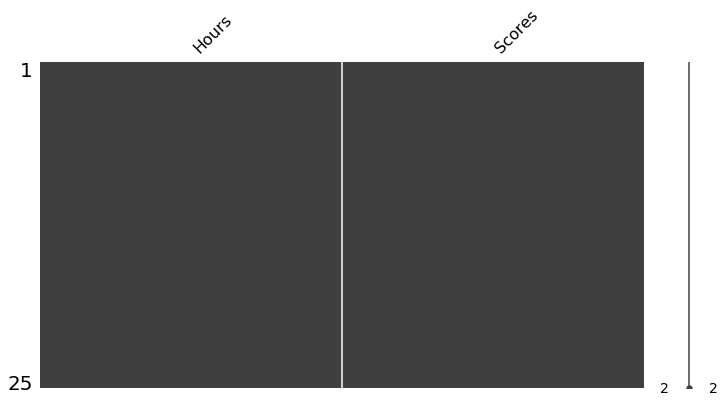

In [12]:
data_missing_with_missing_go(df)

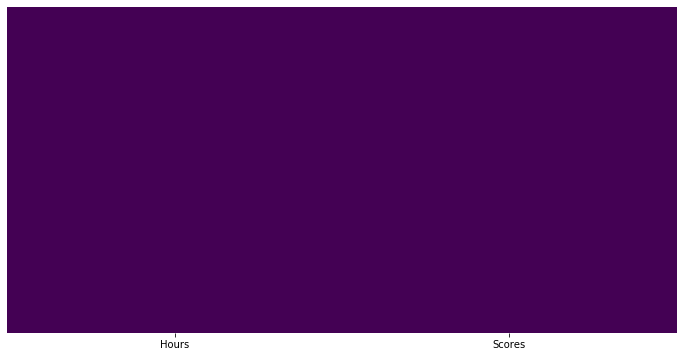

In [13]:
data_missing_heat_map(df)

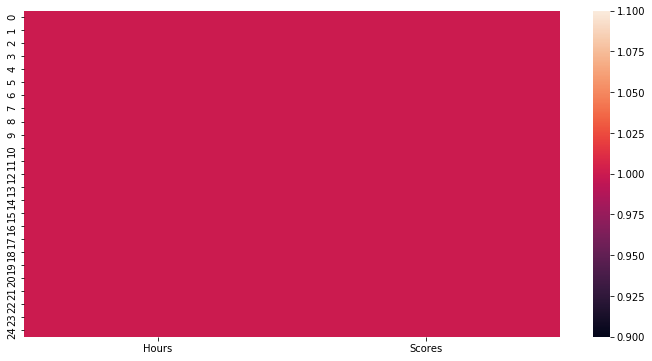

In [14]:
data_missing_heat_map2(df)

In [15]:
data_missing(df)

Hours     0
Scores    0
dtype: int64

In [16]:
data_missing2(df)

Hours 0
 
Scores 0
 


In [17]:
data_missing_columns(df)

Index([], dtype='object')

In [18]:
data_missing_values_percentage(df)

        Total  Percent
Scores      0      0.0
Hours       0      0.0


In [19]:
data_data_types(df)

Hours     float64
Scores      int64
dtype: object

In [20]:
data_table_describe(df)

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
data_describe_each_feature(df)

Hours 
 count    25.000000
mean      5.012000
std       2.525094
min       1.100000
25%       2.700000
50%       4.800000
75%       7.400000
max       9.200000
Name: Hours, dtype: float64
 
Scores 
 count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64
 


In [22]:
data_table_corr(df)

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [23]:
data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [24]:
data_shape(df)

(25, 2)

In [25]:
data_data_frame_Transpose(df)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Hours,2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,...,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8
Scores,21.0,47.0,27.0,75.0,30.0,20.0,88.0,60.0,81.0,25.0,...,95.0,30.0,24.0,67.0,69.0,30.0,54.0,35.0,76.0,86.0


In [26]:
data_index(df)

RangeIndex(start=0, stop=25, step=1)

In [27]:
data_count(df)

Hours     25
Scores    25
dtype: int64

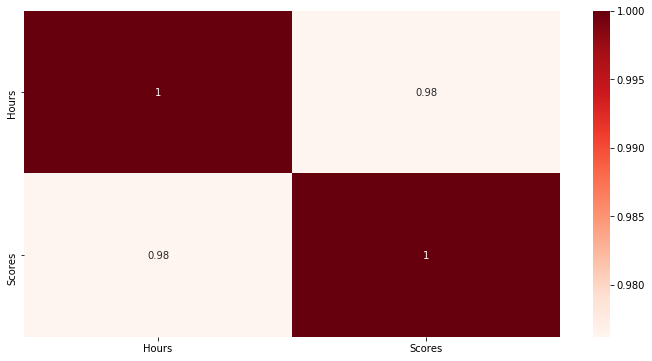

In [28]:
data_heatmap(df)

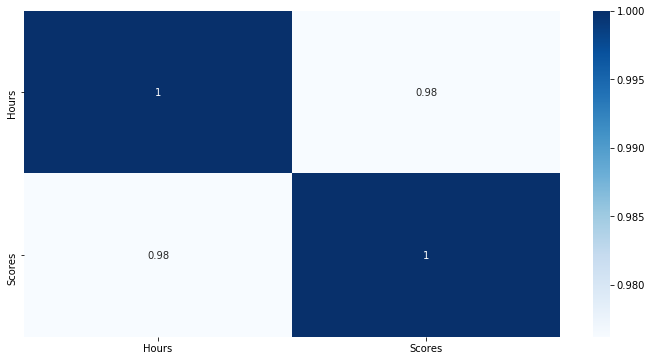

In [29]:
data_heatmap2(df)

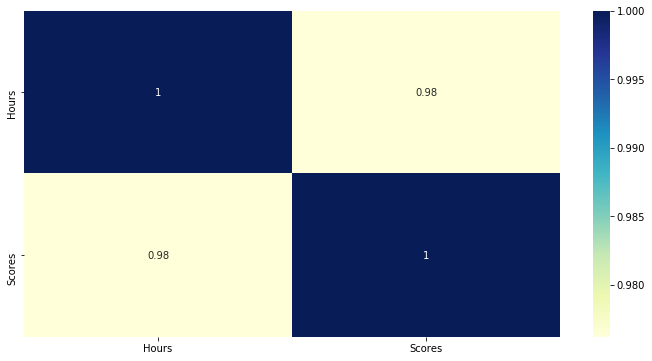

In [30]:
data_heatmap3(df)

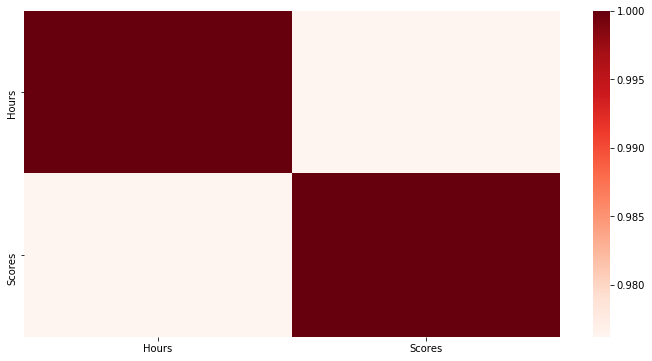

In [31]:
data_heatmap_no_annot(df)

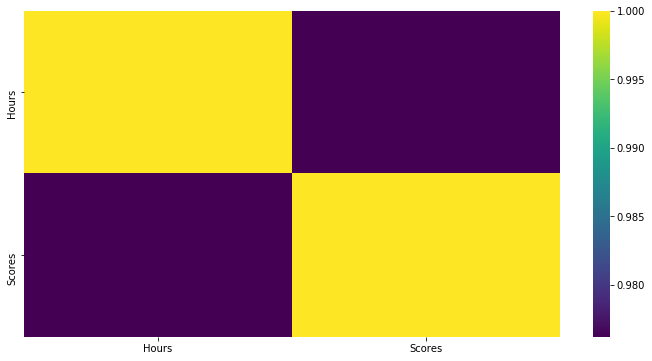

In [32]:
data_heatmap_no_annot2(df)

In [33]:
data_heat_map_other(df)

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Figure size 864x432 with 0 Axes>

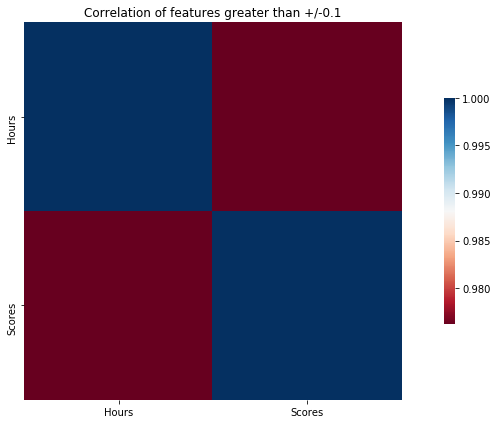

In [34]:
data_heat_map_other2(df)

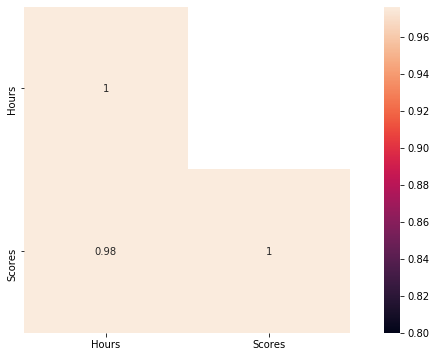

In [35]:
data_heat_map_other3(df)

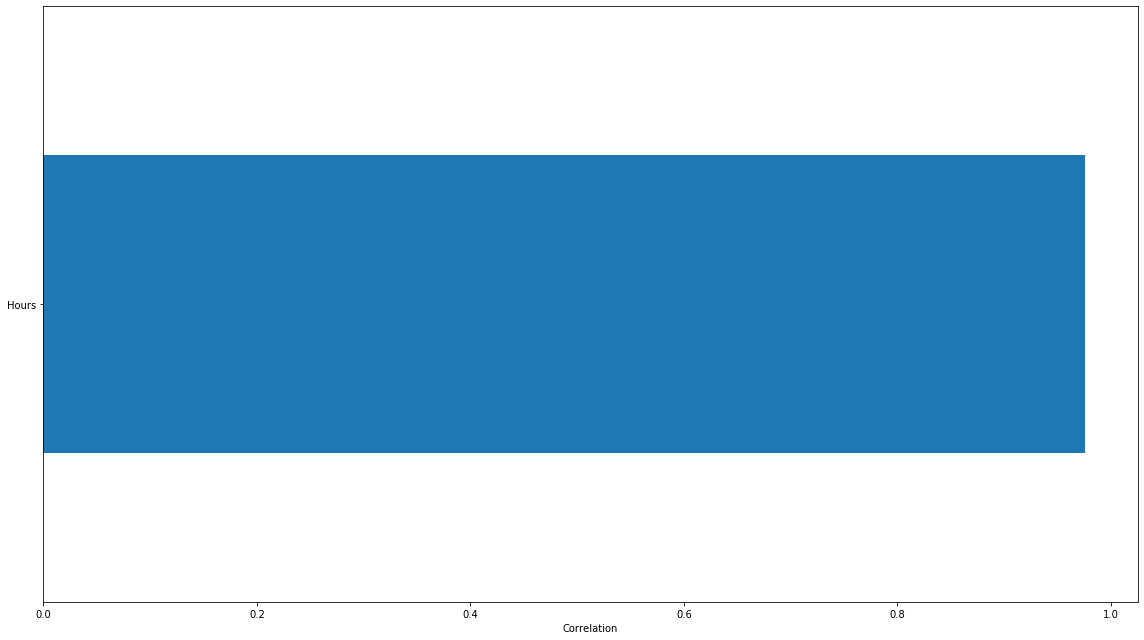

In [36]:
data_check_corr(df)

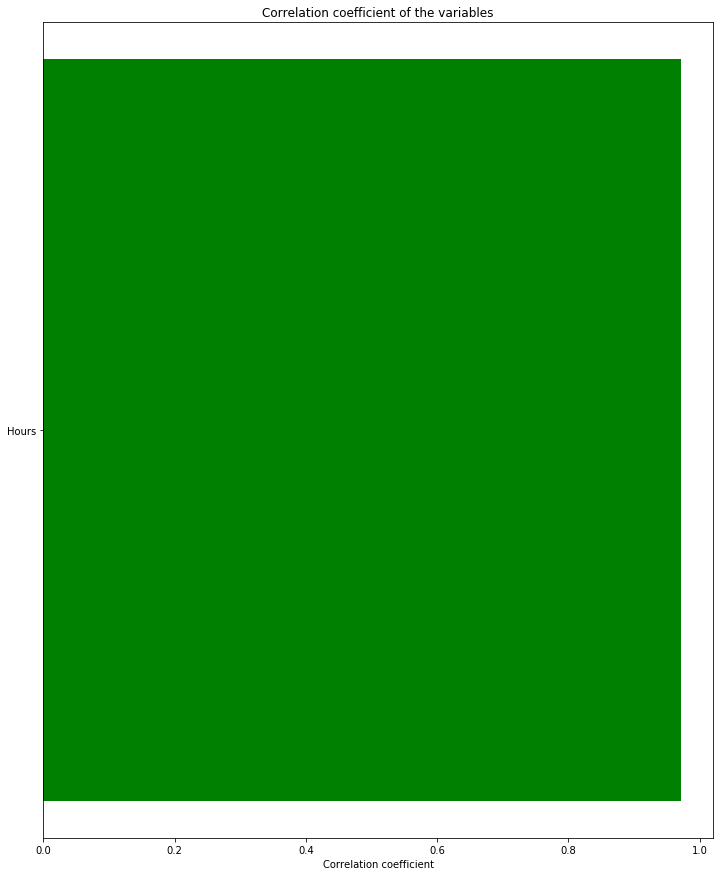

In [37]:
data_check_corr2(df)

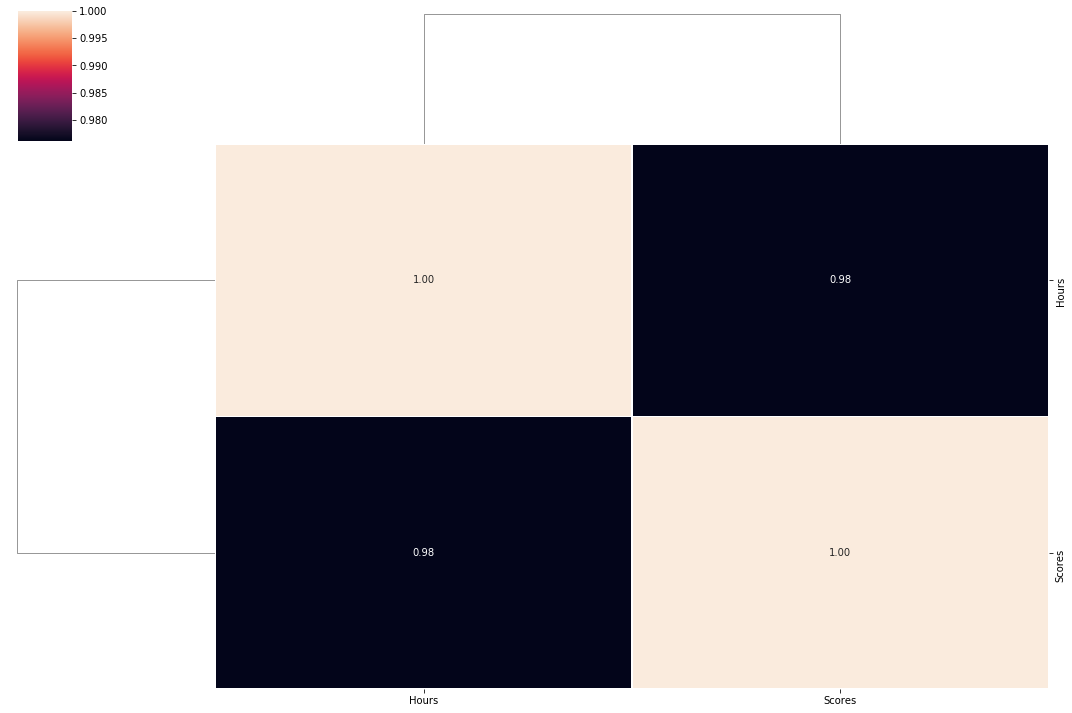

In [38]:
data_heat_map_cluster_map(df)

In [39]:
data_data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
data_display_all_columns(df)

Index(['Hours', 'Scores'], dtype='object')

In [41]:
data_df_size(df)

Hours 25
 
Scores 25
 
Total size of Data_Frame  50


In [42]:
data_check_unique_featues_columns(df)

variable Hours  has unique elemnts  
 23
 

variable Scores  has unique elemnts  
 23
 

Total Number of Elements 
 25


In [43]:
data_print_unique_features(df)

variable Hours  its unique elemnts  
 [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]
 
 
variable Scores  its unique elemnts  
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]
 
 


In [44]:
data_display_unique_features_with_size(df)

 
 
Hours 23
 
[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]
 
 
 
Scores 23
 
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]
 


In [45]:
data_value_counts_all_columns(df)

Column name is: Hours and it value is: 2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64
 
 
Column name is: Scores and it value is: 30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64
 
 


In [46]:
data_show_valuecounts_perc(df)

Hours 2.5    0.08
2.7    0.08
3.8    0.04
8.5    0.04
3.5    0.04
1.5    0.04
5.5    0.04
4.5    0.04
5.9    0.04
6.1    0.04
7.7    0.04
1.9    0.04
1.1    0.04
4.8    0.04
8.3    0.04
8.9    0.04
7.4    0.04
7.8    0.04
5.1    0.04
3.2    0.04
9.2    0.04
3.3    0.04
6.9    0.04
Name: Hours, dtype: float64
 
Scores 30    0.12
95    0.04
62    0.04
85    0.04
86    0.04
67    0.04
24    0.04
69    0.04
17    0.04
41    0.04
42    0.04
75    0.04
47    0.04
76    0.04
81    0.04
20    0.04
21    0.04
54    0.04
88    0.04
25    0.04
27    0.04
60    0.04
35    0.04
Name: Scores, dtype: float64
 


In [47]:
data_value_counts_bins(df)

(5.96, 7.58]                  3
(2.72, 4.34]                  4
(4.34, 5.96]                  5
(7.58, 9.2]                   6
(1.0910000000000002, 2.72]    7
Name: Hours, dtype: int64

In [48]:
data_value_counts_bins2(df)

(3.53, 4.34]                  1
(5.96, 6.77]                  1
(5.15, 5.96]                  2
(6.77, 7.58]                  2
(1.0910000000000002, 1.91]    3
(2.72, 3.53]                  3
(4.34, 5.15]                  3
(7.58, 8.39]                  3
(8.39, 9.2]                   3
(1.91, 2.72]                  4
Name: Hours, dtype: int64

In [49]:
data_data_sort_values(df)

Hours 14    1.1
5     1.5
17    1.9
0     2.5
16    2.5
20    2.7
9     2.7
2     3.2
13    3.3
4     3.5
22    3.8
12    4.5
21    4.8
1     5.1
7     5.5
11    5.9
18    6.1
23    6.9
19    7.4
10    7.7
24    7.8
8     8.3
3     8.5
15    8.9
6     9.2
Name: Hours, dtype: float64
 
Scores 14    17
5     20
0     21
17    24
9     25
2     27
20    30
4     30
16    30
22    35
12    41
13    42
1     47
21    54
7     60
11    62
18    67
19    69
3     75
23    76
8     81
10    85
24    86
6     88
15    95
Name: Scores, dtype: int64
 


In [50]:
data_data_rank(df)

Hours 0      4.5
1     14.0
2      8.0
3     23.0
4     10.0
5      2.0
6     25.0
7     15.0
8     22.0
9      6.5
10    20.0
11    16.0
12    12.0
13     9.0
14     1.0
15    24.0
16     4.5
17     3.0
18    17.0
19    19.0
20     6.5
21    13.0
22    11.0
23    18.0
24    21.0
Name: Hours, dtype: float64
 
Scores 0      3.0
1     13.0
2      6.0
3     19.0
4      8.0
5      2.0
6     24.0
7     15.0
8     21.0
9      5.0
10    22.0
11    16.0
12    11.0
13    12.0
14     1.0
15    25.0
16     8.0
17     4.0
18    17.0
19    18.0
20     8.0
21    14.0
22    10.0
23    20.0
24    23.0
Name: Scores, dtype: float64
 


In [51]:
data_nunique(df)

Hours 23
 
Scores 23
 


In [52]:
data_nlargest(df)

Hours 
     Hours  Scores
6     9.2      88
15    8.9      95
3     8.5      75
8     8.3      81
24    7.8      86
10    7.7      85
19    7.4      69
23    6.9      76
18    6.1      67
11    5.9      62
 
Scores 
     Hours  Scores
15    8.9      95
6     9.2      88
24    7.8      86
10    7.7      85
8     8.3      81
23    6.9      76
3     8.5      75
19    7.4      69
18    6.1      67
11    5.9      62
 


In [53]:
data_nsmallest(df)

Hours 
     Hours  Scores
14    1.1      17
5     1.5      20
17    1.9      24
0     2.5      21
16    2.5      30
9     2.7      25
20    2.7      30
2     3.2      27
13    3.3      42
4     3.5      30
 
Scores 
     Hours  Scores
14    1.1      17
5     1.5      20
0     2.5      21
17    1.9      24
9     2.7      25
2     3.2      27
4     3.5      30
16    2.5      30
20    2.7      30
22    3.8      35
 


In [54]:
data_index_max(df)

Hours      6
Scores    15
dtype: int64

In [55]:
data_index_min(df)

Hours     14
Scores    14
dtype: int64

In [56]:
data_check_outliers(df)

the upper and lower outliers are 14.450000000000001 and -4.3500000000000005 of 
 Hours
the upper and lower outliers are 142.5 and -37.5 of 
 Scores


In [57]:
data_check_outliers2(df)

Feature  Hours 
Upper frence  	   14.450000000000001 	Lower frence       -4.3500000000000005 IQR     4.7
 	 
Feature  Scores 
Upper frence  	   142.5 	Lower frence       -37.5 IQR     45.0
 	 


In [58]:
data_check_outliers_extreme_values(df)

Feature  Hours 
Upper frence  	   21.5 	Lower frence       -11.400000000000002 	IQR     4.7
 	 
Feature  Scores 
Upper frence  	   210.0 	Lower frence       -105.0 	IQR     45.0
 	 


In [59]:
data_data_quants(df)

0.05    1.58
0.25    2.70
0.50    4.80
0.75    7.40
0.95    8.82
Name: Hours, dtype: float64

In [60]:
data_range(df)

Hours ---Range--- 
  8.1
 
 
Scores ---Range--- 
  78
 
 


In [61]:
data_df_max(df)

Hours      9.2
Scores    95.0
dtype: float64

In [62]:
data_df_min(df)

Hours      1.1
Scores    17.0
dtype: float64

In [63]:
data_df_mean(df)

Hours      5.012
Scores    51.480
dtype: float64

In [64]:
data_df_medain(df)

Hours      4.8
Scores    47.0
dtype: float64

In [65]:
data_df_std(df)

Hours      2.525094
Scores    25.286887
dtype: float64

In [66]:
data_check_distribution_normality_values(df)

Hours 
  12.587282172962272 -2.563282172962272
 
Scores 
  127.34066174243407 -24.380661742434064
 


In [67]:
data_sample(df)

,Hours,Scores
23,6.9,76
15,8.9,95
2,3.2,27
5,1.5,20
6,9.2,88
11,5.9,62
18,6.1,67
20,2.7,30
10,7.7,85
16,2.5,30


In [68]:
check_Kurtosis(df)

Hours Kurtosis: -1.302343
Scores Kurtosis: -1.443833


In [69]:
check_Pearsons_corr(df)

 
Hours Pearsons correlation: 1.000
 
Scores Pearsons correlation: 1.000


In [70]:
check_Skewness(df)

Hours Skewness: 0.190338
Scores Skewness: 0.233965


In [71]:
check_spearmanr_corr(df)

 
Hours spearmanr correlation: 1.000
 
Scores spearmanr correlation: 1.000


# Copy Data

In [72]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Understand Data with pandas Eda

In [73]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

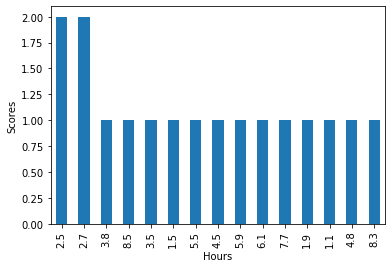

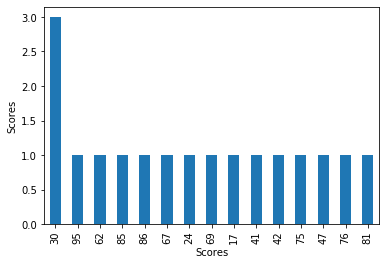

In [74]:
for col in df1.columns:
    df1[col].value_counts().head(n = 15).plot(kind = 'bar')
    plt.xlabel(col)
    plt.ylabel('Scores')
    plt.show()

In [75]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


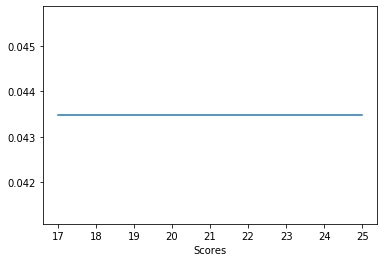

In [76]:
pd.crosstab(df1.Hours,df1.Scores).mean().head().plot();

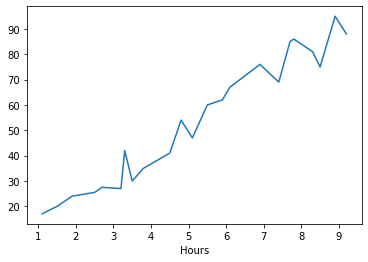

In [77]:
df1.groupby(['Hours']).Scores.mean().plot();

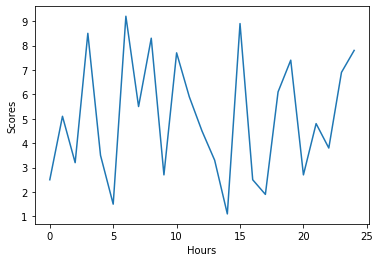

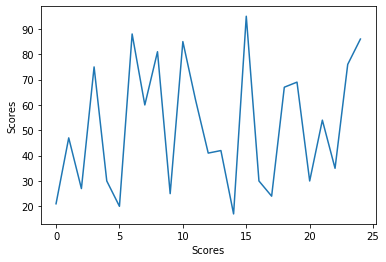

In [78]:
for col in df1.columns:
    df1[col].plot()
    plt.xlabel(col)
    plt.ylabel('Scores')
    plt.show()

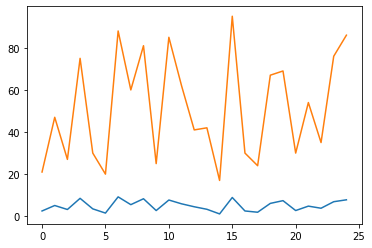

In [79]:
df1.Hours.plot()
df1.Scores.plot();

In [80]:
df1.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [81]:
plt.style.use('tableau-colorblind10')

In [82]:


def hours(number):
    if number > 5.012:
        return "More Hours Spended"
    else:
        return "Less Hours Spended"

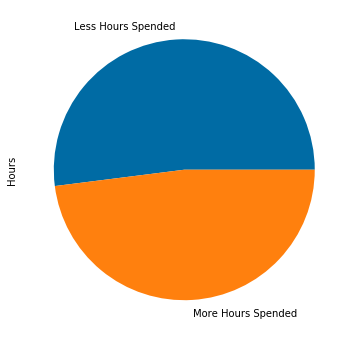

In [83]:
plt.figure(figsize=(12,6))
df1['Hours'].apply(hours).value_counts().plot(kind = 'pie');

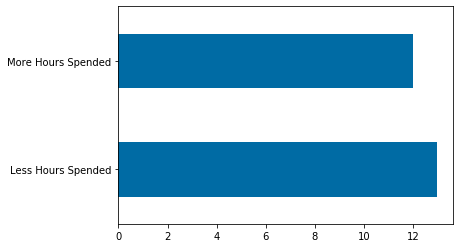

In [84]:
df1['Hours'].apply(hours).value_counts().plot(kind = 'barh');

In [85]:
def scores(number):
    if number > 51.480:
        return "More Marks"
    else:
        return "Less Marks"

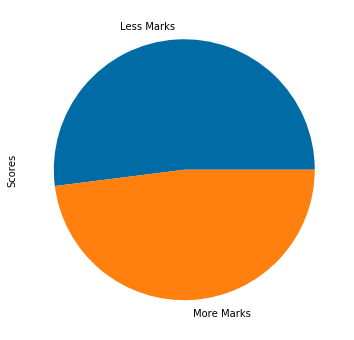

In [86]:
plt.figure(figsize=(12,6))
df1['Scores'].apply(scores).value_counts().plot(kind = 'pie');

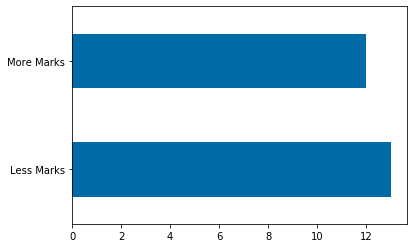

In [87]:
df1['Scores'].apply(scores).value_counts().plot(kind = 'barh');

# EDA 

In [88]:
def box_plots(df):
    for col in df[num]:
        plt.figure(figsize=(10,6))
        df.boxplot(column=col)
        plt.show()
        
def histplot_with_bins(df):
    for col in df[num].columns:
        plt.figure(figsize=(10,6))
        df[col].hist(bins = 50) 
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def histplot_with_bins2(df):
    for col in df[num].columns:
        plt.figure(figsize=(10,6))
        df[col].hist(bins = 100) 
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def histplot_with_bins3(df):
    for col in df[num].columns:
        plt.figure(figsize=(10,6))
        df[col].hist(bins = 50,density = True,cumulative = True) 
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def histplot_and_kdeplot(df):
    for col in df[num].columns:
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        df[col].hist(bins = 50)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        
        plt.subplot(1,2,2)
        sns.kdeplot(df[col])
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        plt.show()
        
def histplot_and_QQplot(df):
    for col in df[num].columns:
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        df[col].hist()
        plt.xlabel(col)
        plt.ylabel('Scores')
        
        plt.subplot(1,2,2)
        stats.probplot(df[col],dist='norm',plot=pylab)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def bar_and_line_plot(df):
    total_len = len(df)
    for col in df.drop('Scores',axis=1):
        temp_df = pd.Series(df[col].value_counts()/total_len).reset_index()
        temp_df.columns = [col,col+'percenatge of Scores']
        temp_df = temp_df.merge(df.groupby([col])['Scores'].mean().reset_index(),on=col,how='left')
        
        fig,ax = plt.subplots()
        ax2 = ax.twinx()
        ax.bar(temp_df.index,temp_df[col+'percenatge of Scores'],color = 'lightgrey',label = col)
        ax2.plot(temp_df.index,temp_df['Scores'],color='green',)
        ax.set_xticklabels([0]+list(temp_df[col]))
        ax.set_xlabel(col)
        
def plot_feature(df,col):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['Scores'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1,2,2)
    
    if df[col].dtype == 'int64' or col == 'Scores':
        mean = df.groupby(col)['Scores'].mean()
        std = df.groupby(col)['Scores'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values + std.values, \
                        alpha=0.1)
    else:
        sns.boxplot(x = col,y='Scores',data=df)
    plt.xticks(rotation=45)
    plt.ylabel('Scores')
    plt.show()  
    
for i in tqdm_notebook(range(100), desc = "EDA Function - 1"):
    time.sleep(0.2)

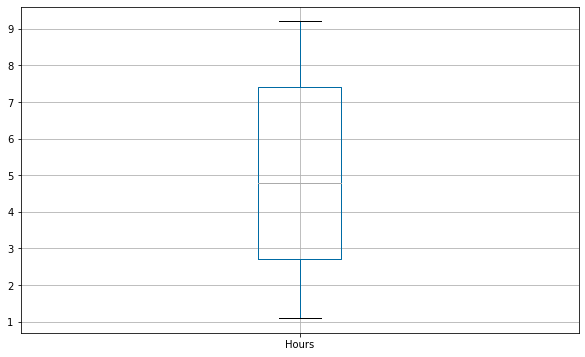

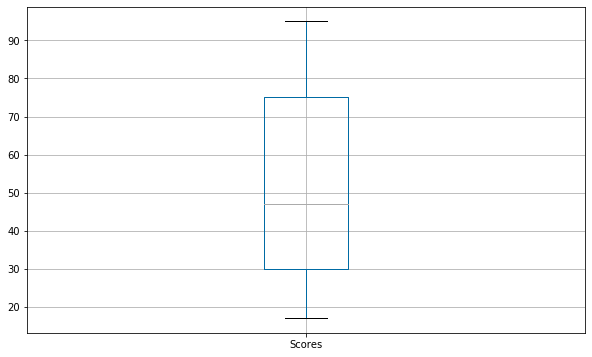

In [89]:
box_plots(df)

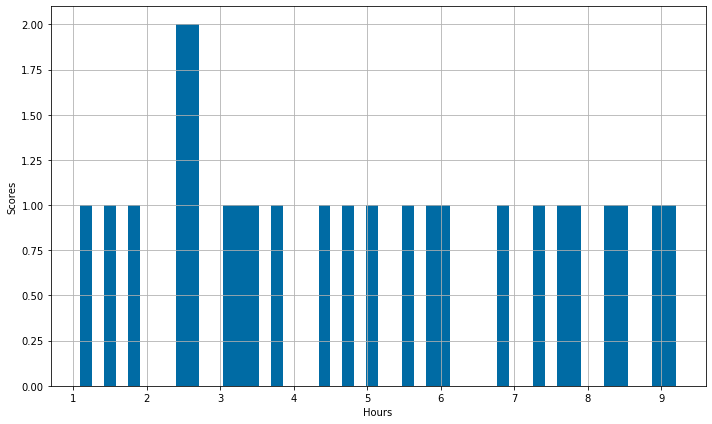

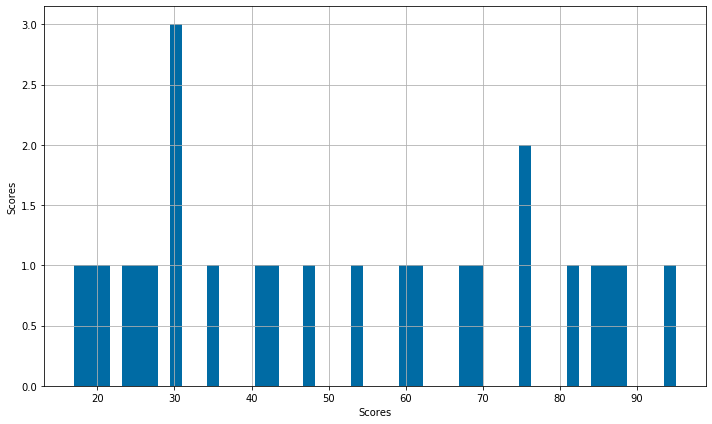

In [90]:
histplot_with_bins(df)

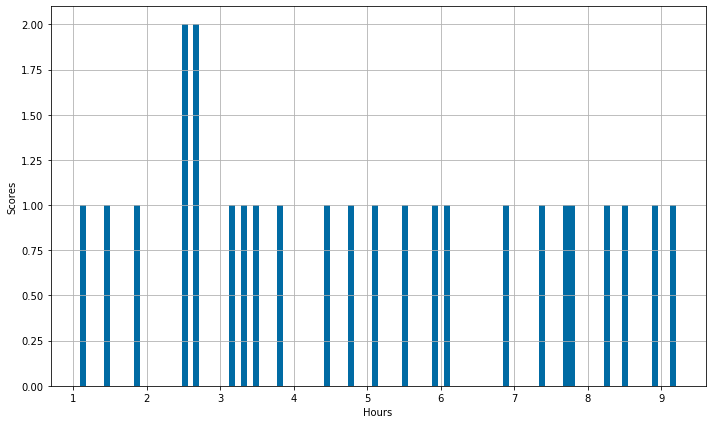

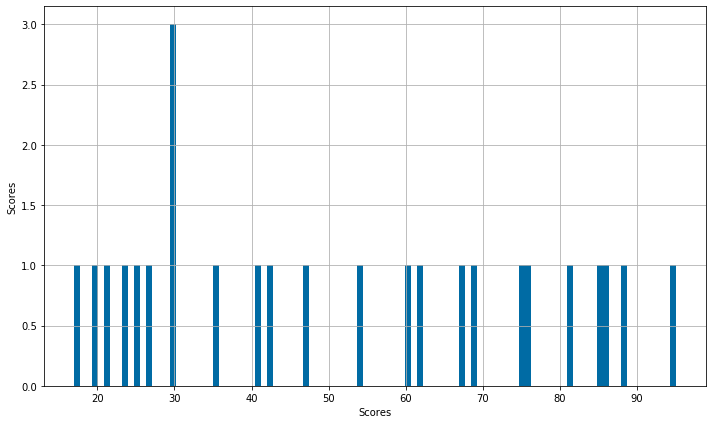

In [91]:
histplot_with_bins2(df)

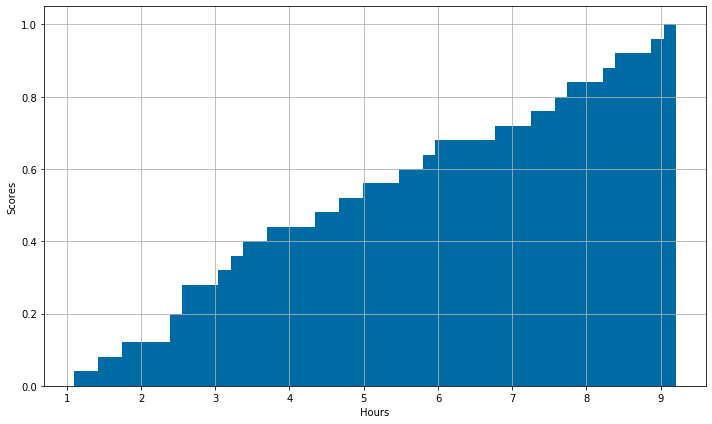

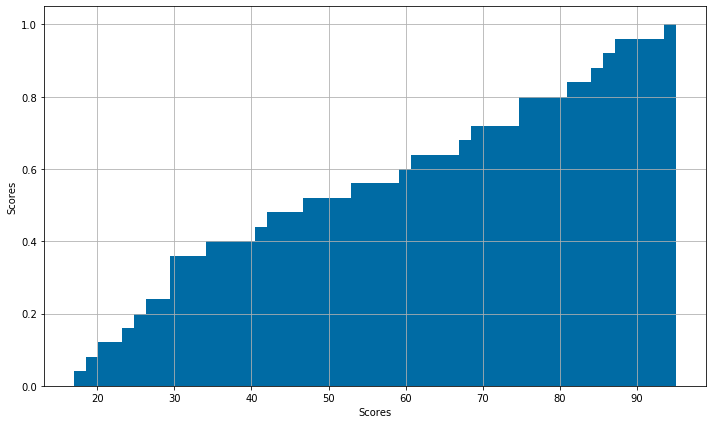

In [92]:
histplot_with_bins3(df)

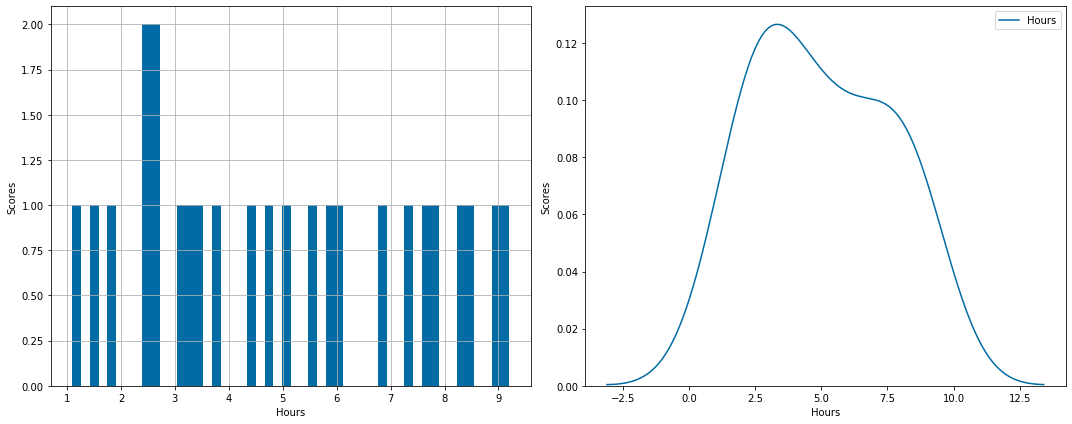

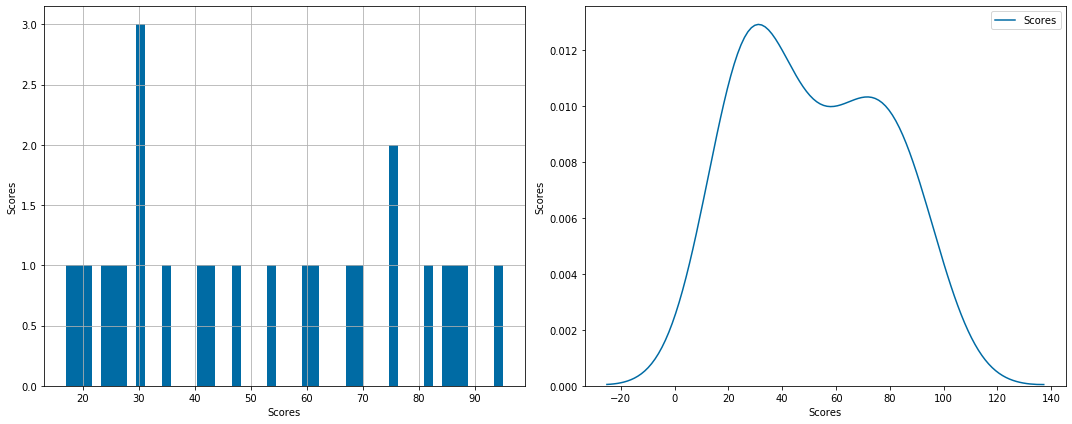

In [93]:
histplot_and_kdeplot(df)

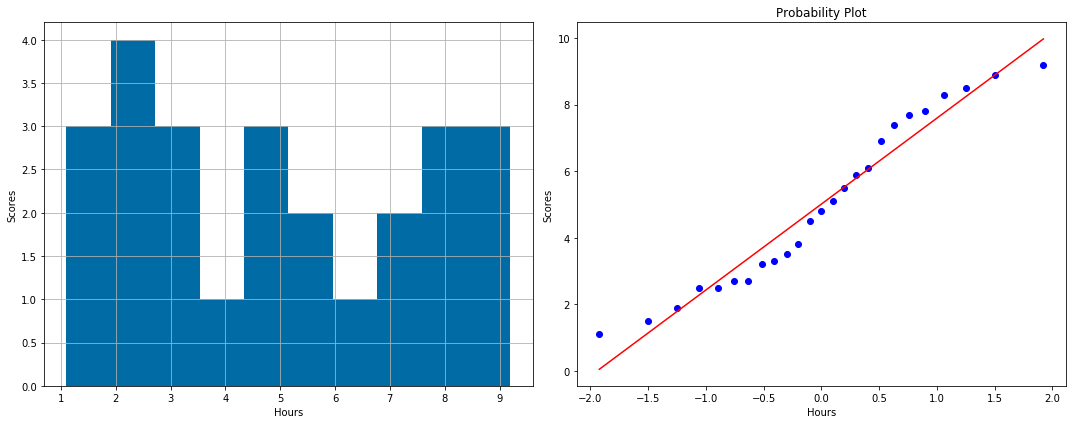

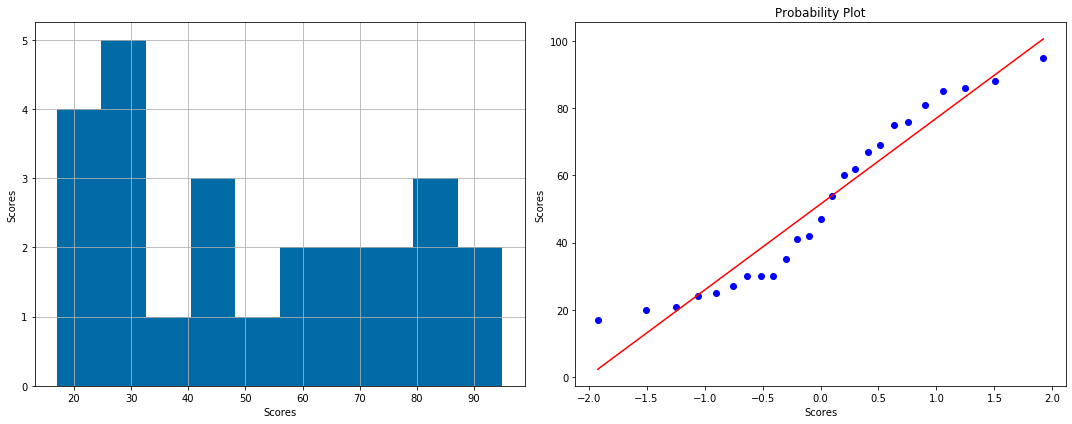

In [94]:
histplot_and_QQplot(df)

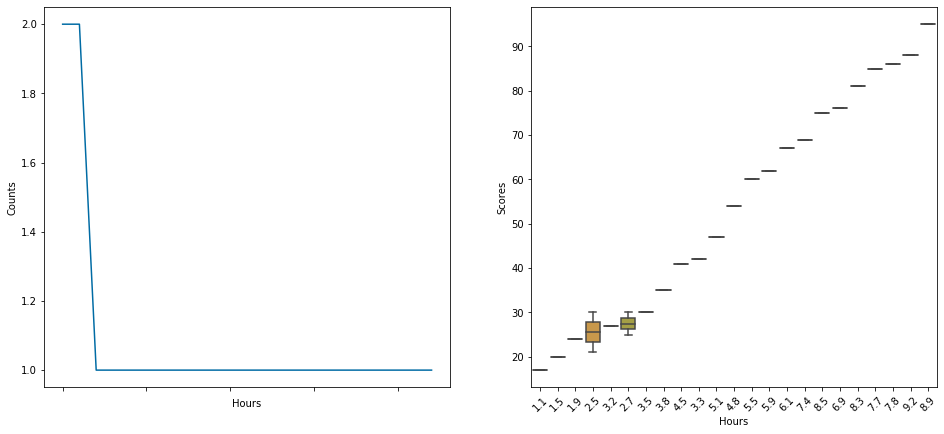

In [95]:
# using df1 for plot

for col in df1.columns.drop("Scores"):
    plot_feature(df1,col)
    plt.show()

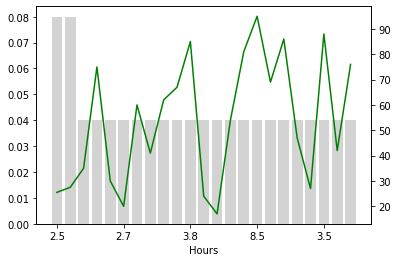

In [96]:
bar_and_line_plot(df)

In [97]:
# we will be using df2 for this Eda

# if u want to change background style use the below

# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

#----------------------------------------------------Bar plot--------------------------------------
def numeric_bar(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x=col,y=df2['Scores'],data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_bar_point(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x=col,y=df2['Scores'],data=df2)
        sns.pointplot(x=col,y='Scores',data=df2,color='Black')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()

        
def numeric_bar_stripplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x=col,y='Scores',data=df2)
        sns.stripplot(x=col,y='Scores',data=df2,jitter=True,color='Black')
        plt.tight_layout()
        plt.show()
        
        
#----------------------------------------------------Box plot-------------------------------------------
def numeric_box(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=col,y=df2['Scores'],data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
        
def numeric_box_point(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=col,y='Scores',data=df2)
        sns.pointplot(x=col,y='Scores',data=df2,color='Black')
        plt.tight_layout()
        plt.show()
        
        
def numeric_box_stripplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=col,y='Scores',data=df2)
        sns.stripplot(x=col,y='Scores',data=df2,jitter=True,edgecolor='gray')
        plt.tight_layout()
        plt.show()
        
        
#----------------------------------------------------Boxen plot------------------------------------           
def numeric_boxen_plot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.boxenplot(x=col,y=df2['Scores'],data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show() 
        
        
def numeric_boxen_point_plot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.boxenplot(x=col,y=df2['Scores'],data=df2)
        sns.pointplot(x=col,y='Scores',data=df2,color='Black')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show() 
        

        
def numeric_boxen_stripplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.boxenplot(x=col,y='Scores',data=df2)
        sns.stripplot(x=col,y='Scores',data=df2,jitter=True,edgecolor='gray')
        plt.tight_layout()
        plt.show()
        

        
#-------------------------------------------------------VIOLIN Plot-----------------------------------         
def numeric_violinplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.violinplot(x=col,y=df2['Scores'],data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
        
def numeric_violinplot_stripplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.violinplot(x=col,y=df2['Scores'],data=df2)
        sns.stripplot(x=col,y=df2['Scores'],data=df2,jitter=True,edgecolor='gray')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
        
#-------------------------------------------------------Joint Plot----------------------------------
def numeric_joint(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=col,y=df2['Scores'],data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_joint_reg(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=col,y='Scores',data=df2,kind='reg')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_joint_hex(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=col,y=df2['Scores'],data=df2,kind='hex',color='g')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_joint_hex2(df):
    for col in df[num].columns:
        plt.figure(figsize=(18,9))
        sns.jointplot(x=col,y='Scores',data=df,kind='hex')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_joint_reg(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=col,y='Scores',data=df2,kind='reg')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_joint_kde(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=col,y='Scores',data=df2,color='r',kind='kde')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_joint_kde2(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=col,y='Scores',data=df2,color='magenta',kind='kde')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#----------------------------------------------------Lm Plot-------------------------------------- 
def numeric_lm_plot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.lmplot(x=col,y='Scores',data=df2,aspect=1,height=8,col = None)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()

#----------------------------------------------------KDE Plot--------------------------------------
def numeric_kde(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.kdeplot(data=df2[col])
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#------------------------------------------------------Numeric Relationship------------------------       
def numeric_linear_Relation(df):
    rows = 3
    cols = 2
    fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,11))
    col = df2[num].columns
    index = 0
    for i in range(rows):
        for j in range(cols):
            sns.regplot(x=df2[col[index]],y=df2['Scores'],ax=ax[i][j])
        index = index + 1
        
#----------------------------------------------------Cat Plot-------------------------------------
def numeric_and_cat_catplot(df):
    for col in df2.columns:
        plt.figure(figsize=(18,9))
        sns.catplot(data=df2,x=col,y='Scores')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_and_cat_catplot_pointplot(df):
    for col in df2.columns:
        plt.figure(figsize=(18,9))
        sns.catplot(data=df2,x=col,y='Scores')
        sns.pointplot(x = col,y ='Scores',data=df2,color='Black')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()

#-------------------------------------------------------Stripplot Plot---------------------------    
def numeric_stripplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.stripplot(x=col,y=df2['Scores'],data=df2,jitter=True,edgecolor='gray',size=10,palette='winter',orient='v')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#-------------------------------------------------------swarmplot Plot---------------------------   
def numeric_swarmplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.swarmplot(x=col,y='Scores',data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        

        
#----------------------------------------------------Scatter-Plot-----------------------------------
def numeric_scatter(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        plt.scatter(x=col,y='Scores',data=df2)
        plt.tight_layout()
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.show() 
        
def numeric_scatter2(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        plt.scatter(x=col,y='Scores',data=df2)
        plt.tight_layout()
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.axhline(15,color='Black')
        plt.show()   
        
def numeric_scatter3(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        plt.scatter(x=col,y='Scores',data=df2)
        plt.tight_layout()
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.axhline(15,color='Black')
        plt.axvline(50,color='Black')
        plt.show()        
              
#-------------------------------------------------------factor Plot-----------------------------------     
def numeric_factorplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.factorplot(x=col,y='Scores',data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#-------------------------------------------------------Resid Plot--------------------------------------    
def numeric_residplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.residplot(x=col,y='Scores',data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#-------------------------------------------------------Dis Plot-----------------------------------------      
def numeric_dis(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.distplot(df2[col],color='red')
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
def numeric_dis2(df):
    rows = 2
    cols = 2
    fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,10))
    col = df2[num].columns
    index = 0
    for i in range(rows):
        for j in range(cols):
            sns.distplot(df2[col[index]],ax=ax[i][j])
            index = index + 1
    plt.tight_layout()
    plt.show()
        
#------------------------------------------------------Pandas  Plot-------------------------------------
def numeric_pandas_plot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        plt.plot(col,'Scores',data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#------------------------------------------------------Pandas bar Plot-----------------------------------
def numeric_pandas_bar(df):
    for col in df2[num].columns:
        plt.figure(figsize=(15,6))
        plt.bar(col,'scores',data=df2)
        plt.xlabel(col)
        plt.ylabel('scores')
        plt.tight_layout()
        plt.show()
        
        
#------------------------------------------------------Line Plot------------------------------------------
def numeric_lineplot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        sns.lineplot(x=col,y='Scores',data=df2)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#------------------------------------------------------Scipy Plot------------------------------------------    
def numeric_scipy_prob(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,6))
        st.probplot(df2[col],plot=plt)
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#-----------------------------------------------------Numeric Value Counts Plot------------------------------
def numeric_value_counts(df):
    for col in df2[num]:
        plt.figure(figsize=(12,6))
        plt.plot(df2[col].value_counts())
        plt.xlabel(col)
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()
        
#------------------------------------------------------Pie and bar plot--------------------------------------   
def numeric_pie_and_bar(df):
    for col in df2[num].columns:
        fig,ax=plt.subplots(1,2,figsize=(18,8))
        df2[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
        ax[0].set_title(col)
        ax[0].set_ylabel(col)
        sns.countplot(col,data=df2,ax=ax[1],order=df2[col].value_counts().index)
        ax[1].set_title(col)
        plt.show()
        
        
#------------------------------------------------------barh and pie plot------------------------------------
def numeric_barh_and_pie(df):
    for col in df2[num].columns:
        fig,ax=plt.subplots(1,2,figsize=(15,8))
        clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
        df3[col].value_counts().sort_values(ascending=False).sort_values().plot(kind='barh',color=clr,ax=ax[0])
        ax[0].set_title("scores",size=20)
        ax[0].set_xlabel('scores',size=18)
        count=df3[col].value_counts()
        groups=list(df3[col].value_counts().index)
        counts=list(count)
        counts.append(count.agg(sum)-count.agg('sum'))
        groups.append('Other')
        type_dict=pd.DataFrame({"group":groups,"counts":counts})
        clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
        qx=type_dict.plot(kind='pie',y='counts',labels=groups,colors=clr1,autopct='%1.1f%%',pctdistance=0.9,radius=1.2,ax=ax[1])
        plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
        plt.subplots_adjust(wspace =0.5, hspace =0)
        plt.ioff()
        plt.ylabel('')
        plt.show()
        
#------------------------------------------------------dis and scatter sub plot---------------------------   
def numeric_sub_plot(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        g = sns.distplot((df2[col] + 1))
        plt.subplot(1,2,2)
        plt.scatter(range(df2.shape[0]), np.sort(np.log(df2[col]+1).values))
        plt.xticks(rotation=45)
        plt.show() 
        
def numeric_sub_plot2(df):
    for col in df2[num].columns:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        g = sns.distplot(df2[col].values, bins=100, kde=False)
        plt.subplot(1,2,2)
        plt.scatter(range(df2.shape[0]), np.sort(np.log(df2[col]+1).values))
        plt.xticks(rotation=45)
        plt.show() 
        
#------------------------------------------------------hist sub plot-----------------------------------------      
def numeric_two_hist(df):
    for col in df2[num].columns:
        fig,axes=plt.subplots(nrows=2,ncols=1)
        df2.plot(kind='hist',y=col,bins=50,range=(0,100),density=True,ax=axes[0])
        df2.plot(kind='hist',y=col,bins=100,density=True,ax=axes[1],cumulative=True)
        plt.show()  
        
#----------------------------------------------------Dis and Kde sub plot--------------------------------------   
def numeric_displot_and_kde(df):
    plt.figure(figsize=(20,25))
    i = 0
    for item in df2[num].columns:
        i += 1
        plt.subplot(8, 2, i)
        sns.distplot(df2[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "blue", "lw": 5, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
plt.show()

#----------------------------------------------------Dis and Kde sub plot---------------------------------------    
def numeric_dis_and_prob_plot(df):
    for col in df2[num].columns:
        sns.distplot(df2[col], fit=norm);
        fig = plt.figure()
        res = stats.probplot(df2[col], plot=plt) 
        fig = plt.figure()
        
#----------------------------------------------------target sub plot----------------------------------------------
def target_subplot(df):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.boxplot(df2.Scores)
    plt.subplot(1,2,2)
    sns.distplot(df2.Scores,bins=20)
    plt.show()
    
#----------------------------------------------------Numeric sub and reg plot--------------------------------------         
def numeric_sub_plot_reg_and_target(df):
    rows = 2
    cols = 2
    fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,35))
    col = df2[num].columns
    index = 0
    for i in range(rows):
        for j in range(cols):
            sns.regplot(x=df2[col[index]],y=df2['Scores'],ax=ax[i][j])
            index = index + 1    
plt.show()

#----------------------------------------------------Learning Curve plot--------------------------------------------
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Scores")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt


for i in tqdm_notebook(range(10), desc = "Eda Functions - 2", leave = True): 
    time.sleep(0.5)
    for i in tqdm_notebook(range(10), desc = "Num & Cat Eda Functions", leave = False):
        time.sleep(0.2)


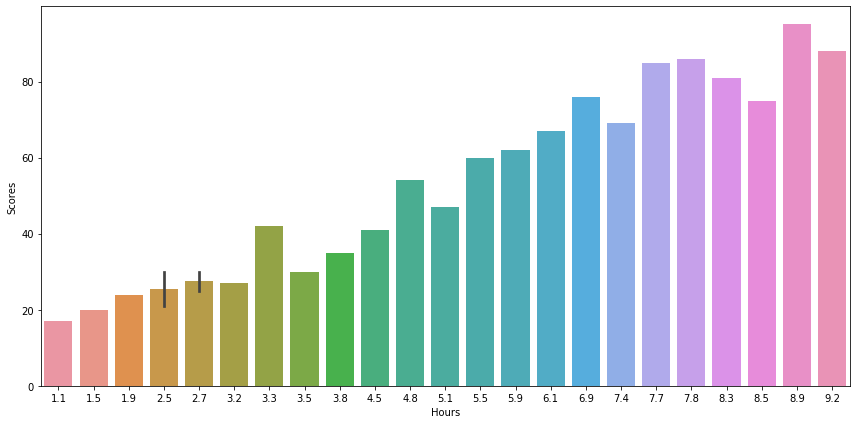

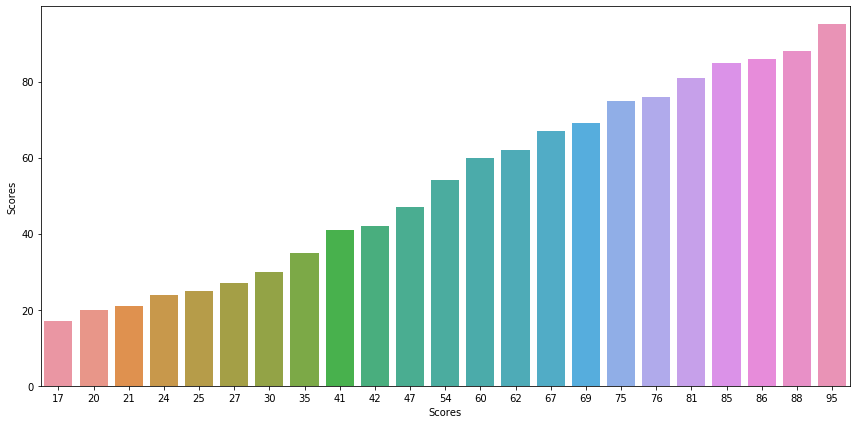

In [98]:
numeric_bar(df)

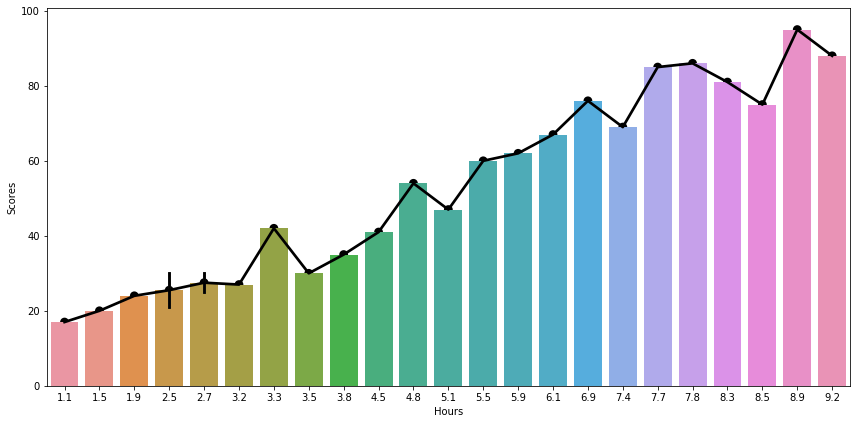

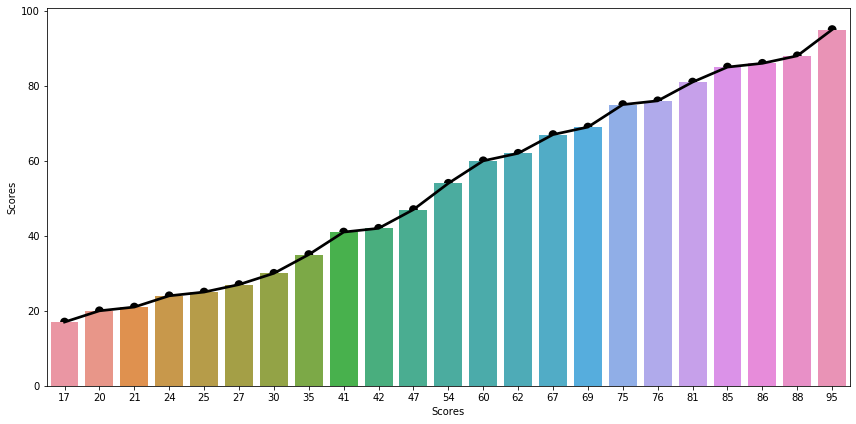

In [99]:
numeric_bar_point(df)

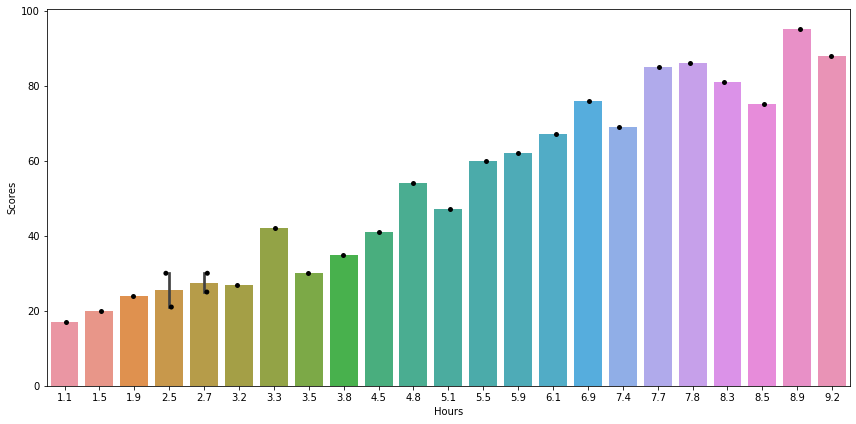

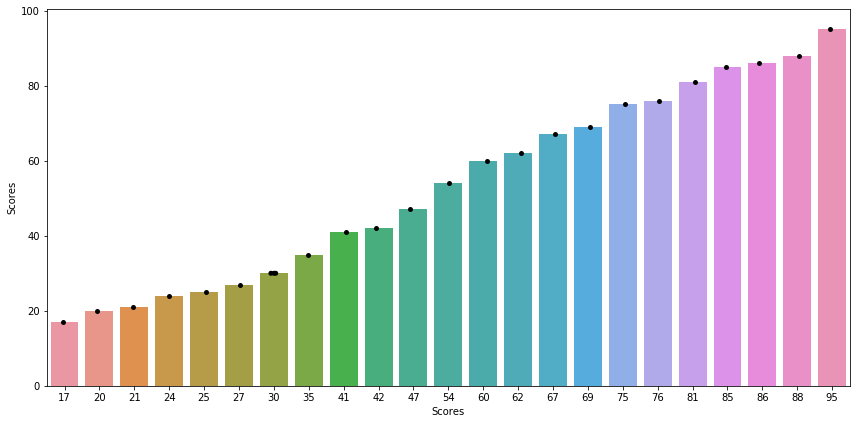

In [100]:
numeric_bar_stripplot(df)

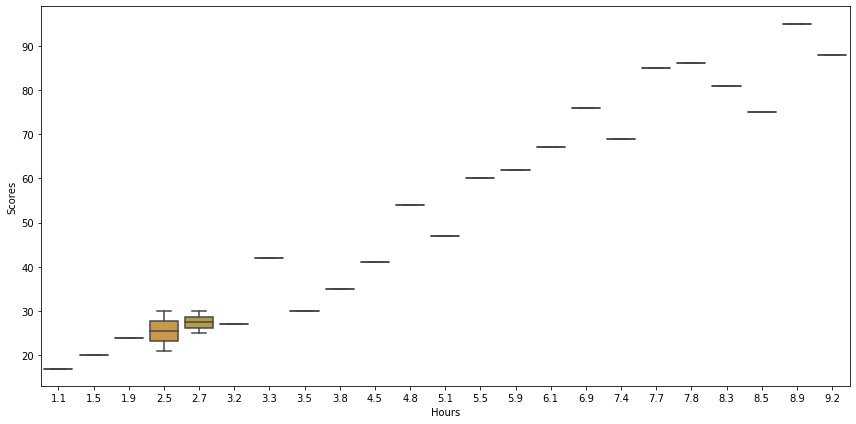

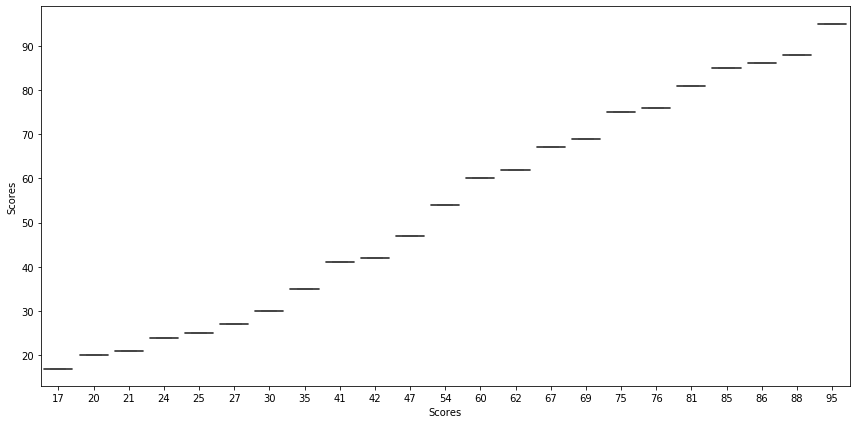

In [101]:
numeric_box(df)

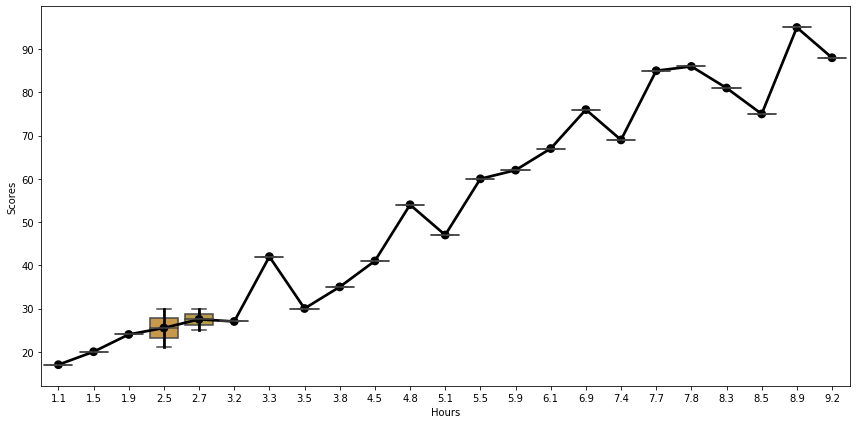

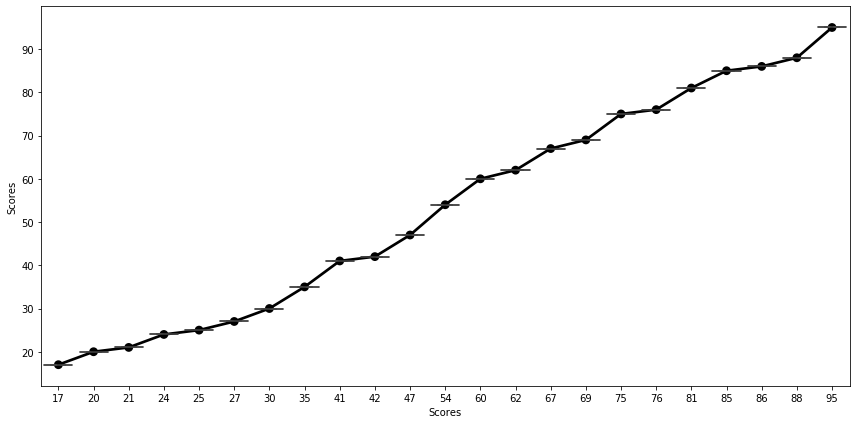

In [102]:
numeric_box_point(df)

<Figure size 864x432 with 0 Axes>

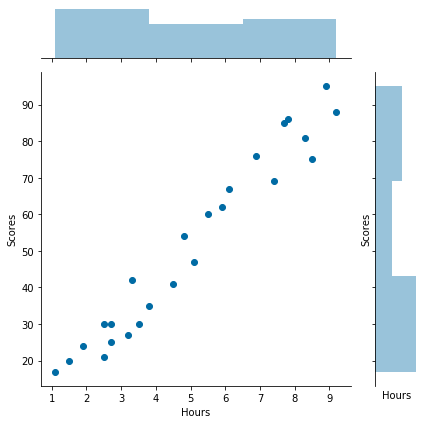

<Figure size 864x432 with 0 Axes>

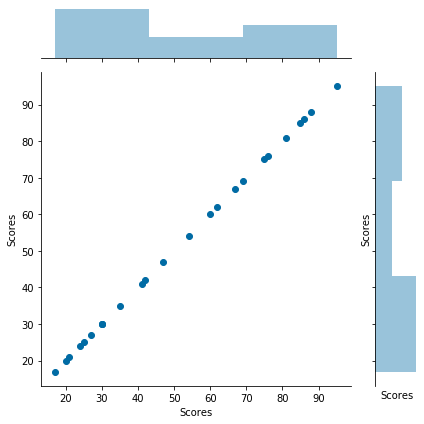

In [103]:
numeric_joint(df)

<Figure size 864x432 with 0 Axes>

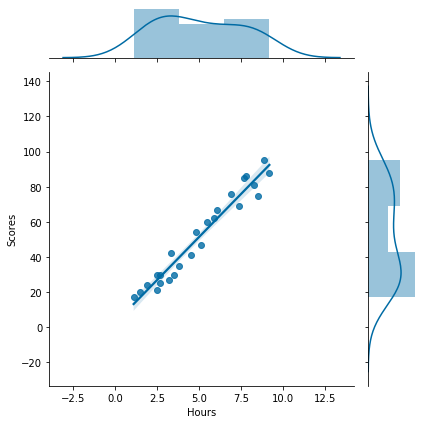

<Figure size 864x432 with 0 Axes>

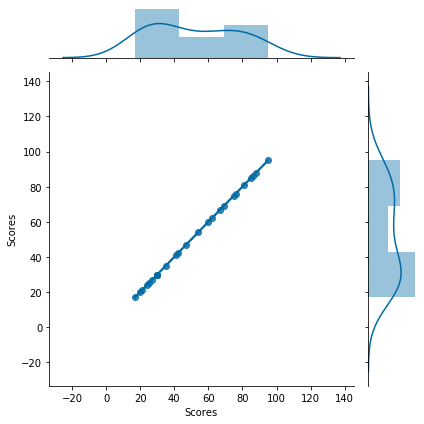

In [104]:
numeric_joint_reg(df)

<Figure size 864x432 with 0 Axes>

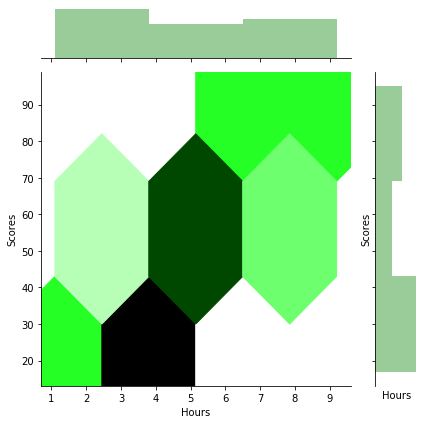

<Figure size 864x432 with 0 Axes>

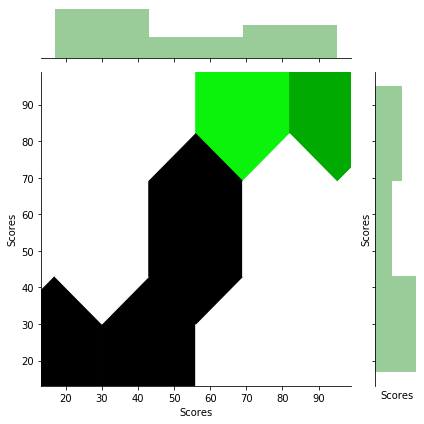

In [105]:
numeric_joint_hex(df)

<Figure size 1296x648 with 0 Axes>

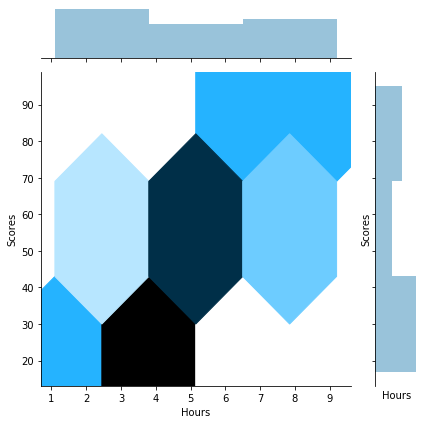

<Figure size 1296x648 with 0 Axes>

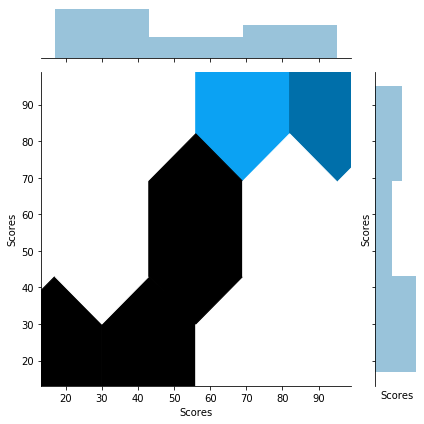

In [106]:
numeric_joint_hex2(df)

<Figure size 864x432 with 0 Axes>

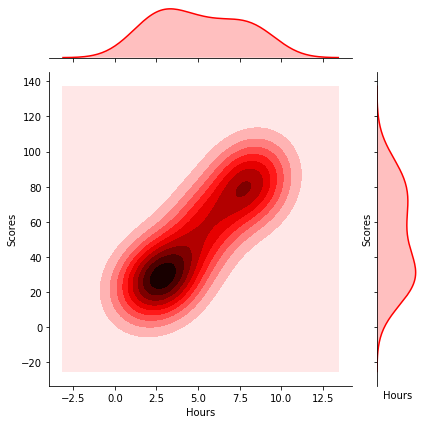

<Figure size 864x432 with 0 Axes>

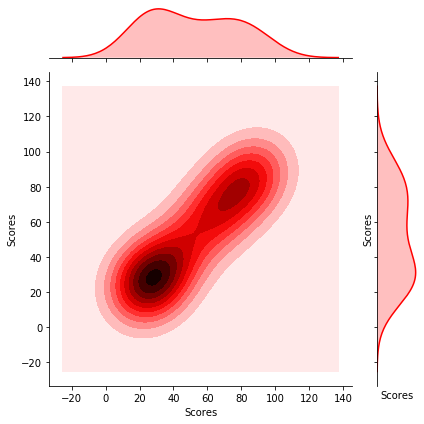

In [107]:
numeric_joint_kde(df)

<Figure size 864x432 with 0 Axes>

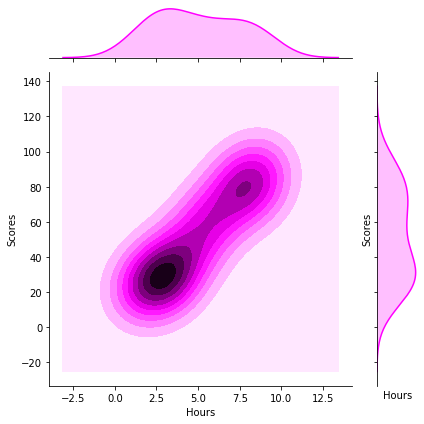

<Figure size 864x432 with 0 Axes>

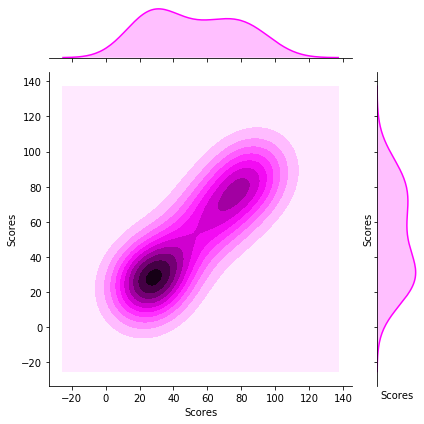

In [108]:
numeric_joint_kde2(df)

<Figure size 864x432 with 0 Axes>

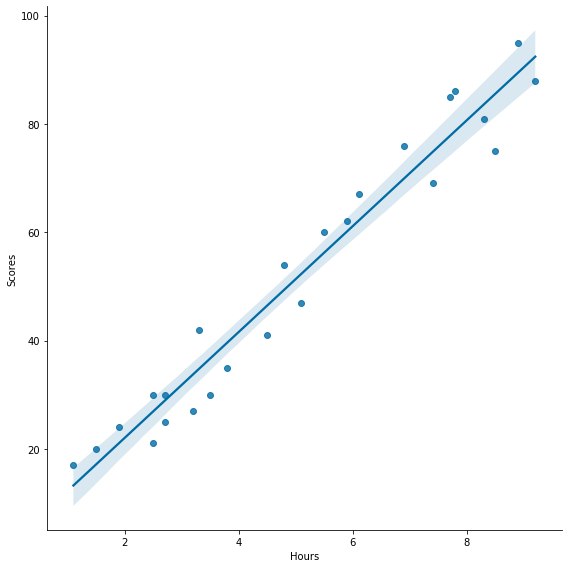

<Figure size 864x432 with 0 Axes>

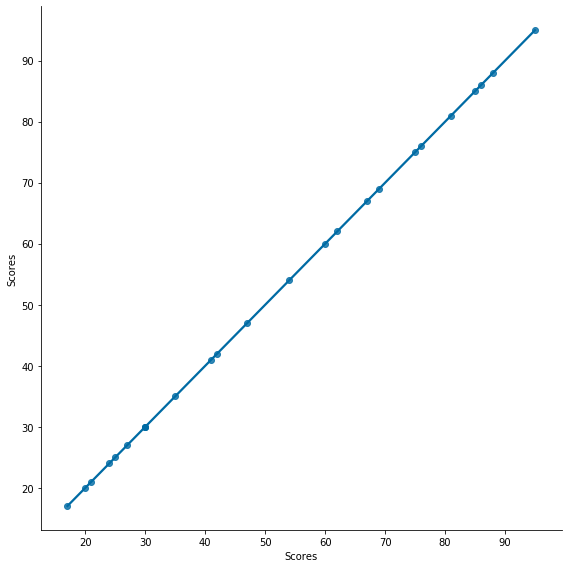

In [109]:
numeric_lm_plot(df)

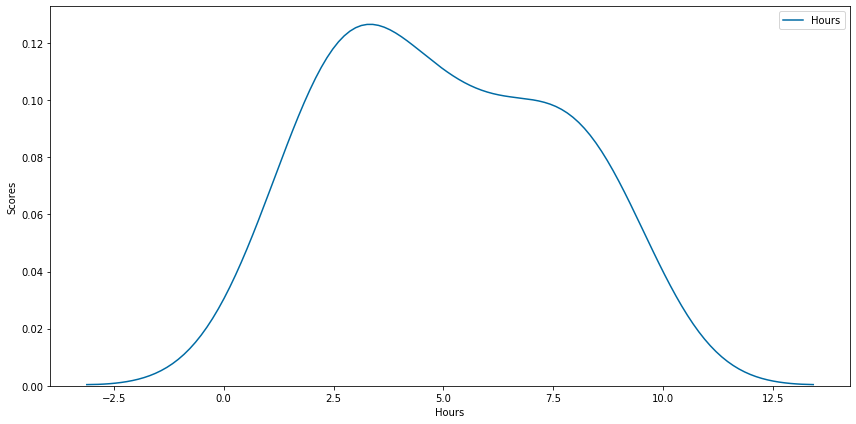

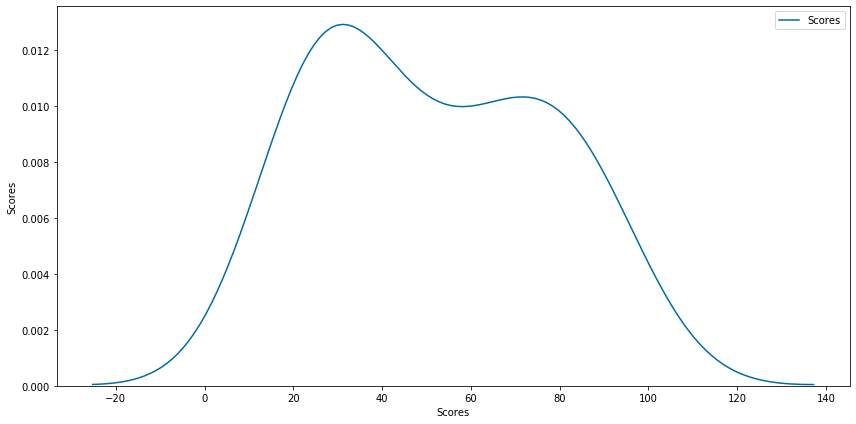

In [110]:
numeric_kde(df)

<Figure size 1296x648 with 0 Axes>

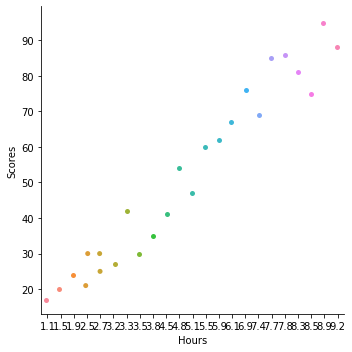

<Figure size 1296x648 with 0 Axes>

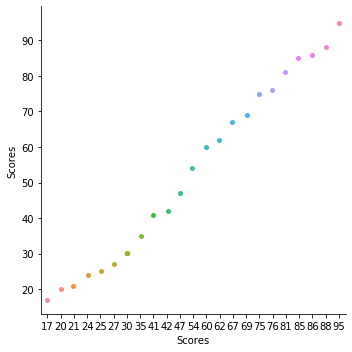

In [111]:
numeric_and_cat_catplot(df)

<Figure size 1296x648 with 0 Axes>

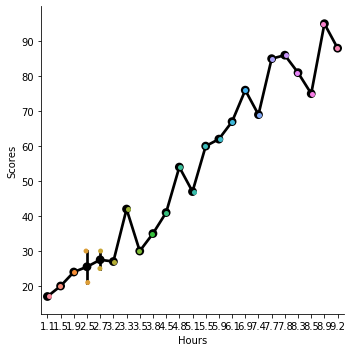

<Figure size 1296x648 with 0 Axes>

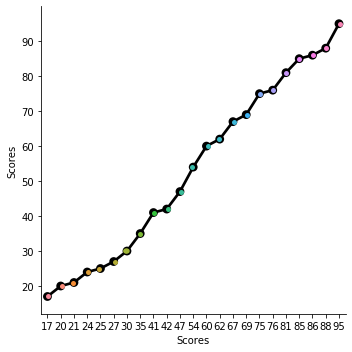

In [112]:
numeric_and_cat_catplot_pointplot(df)

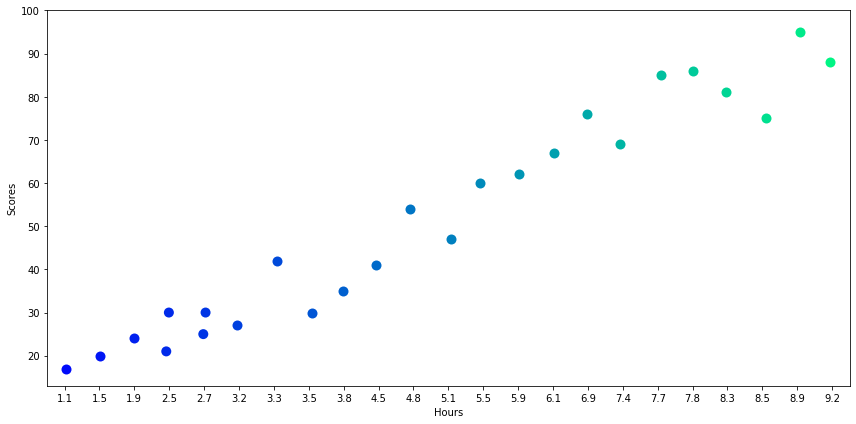

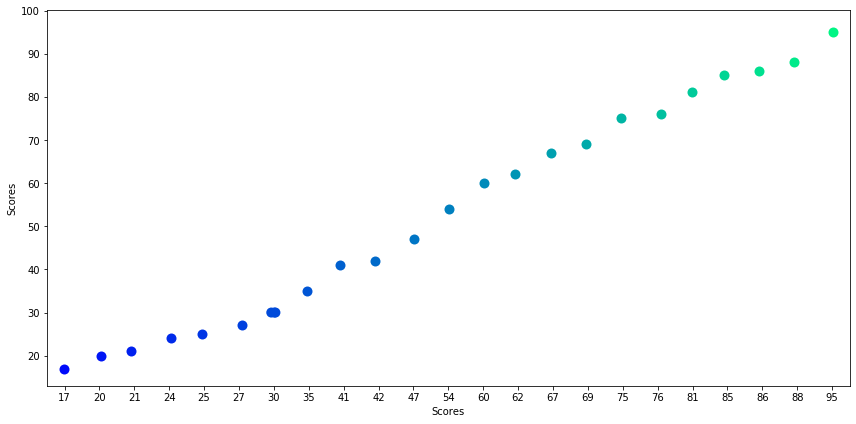

In [113]:
numeric_stripplot(df)

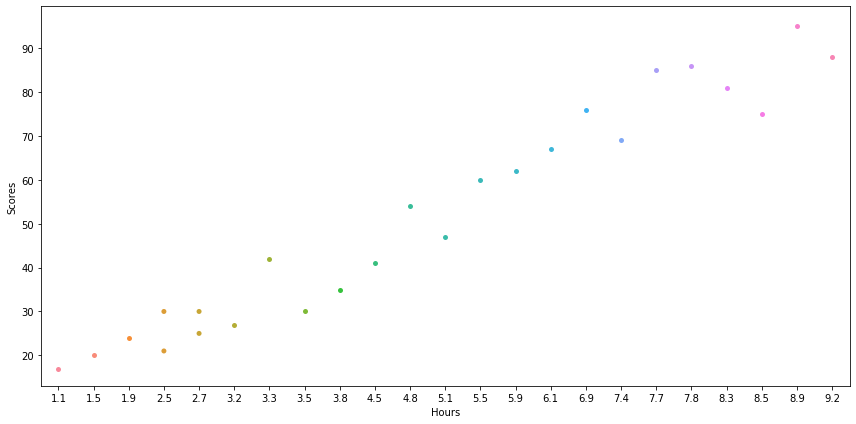

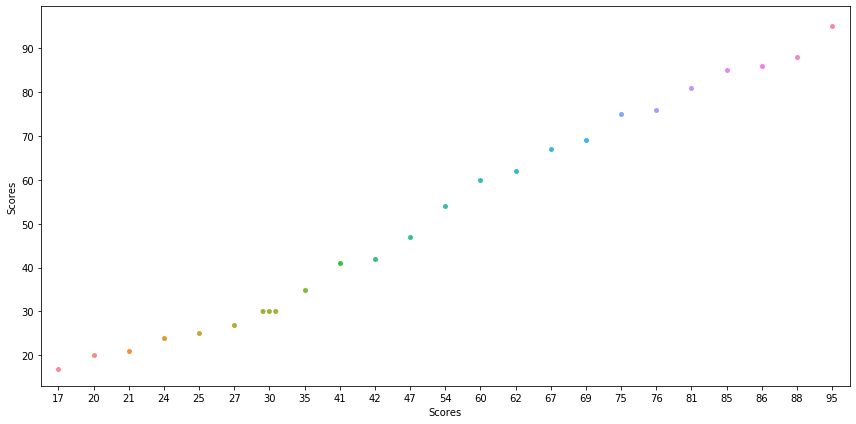

In [114]:
numeric_swarmplot(df)

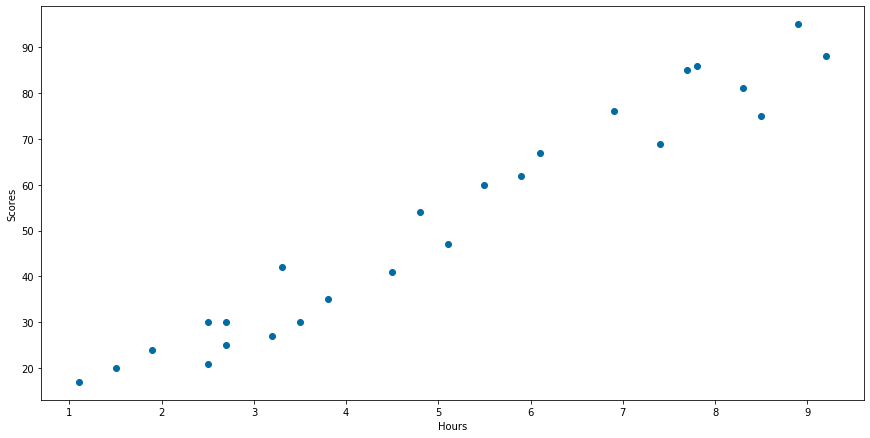

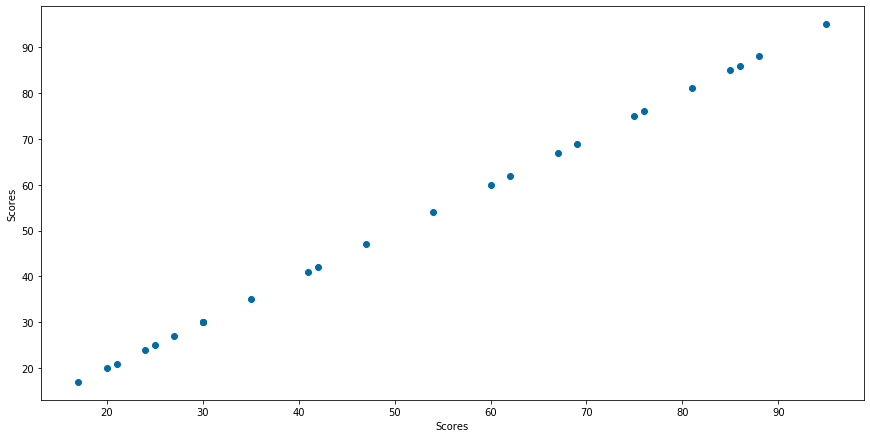

In [115]:
numeric_scatter(df)

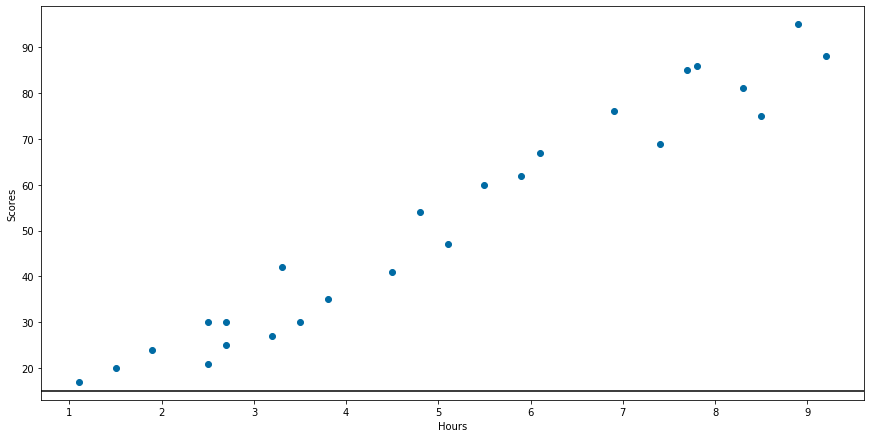

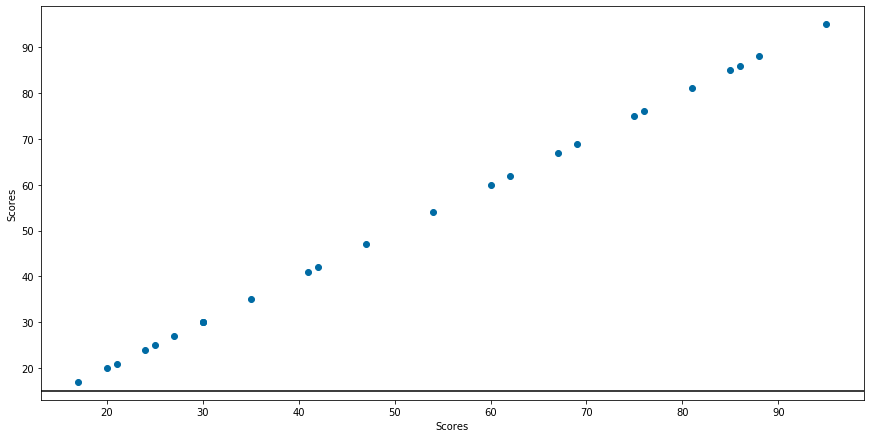

In [116]:
numeric_scatter2(df)

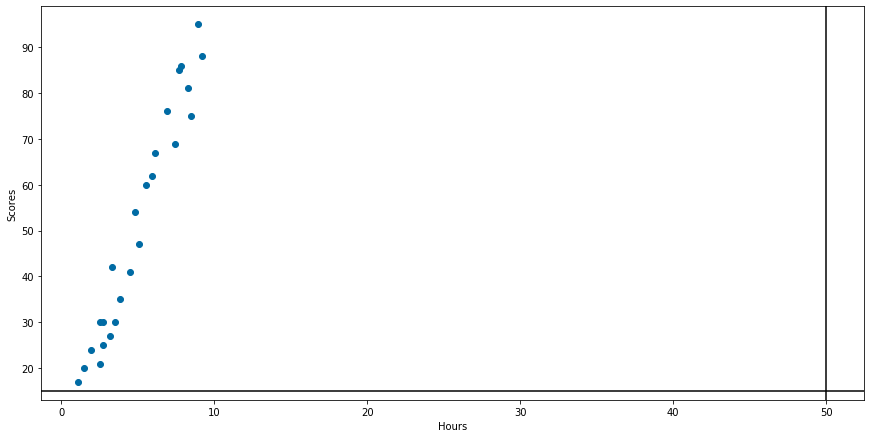

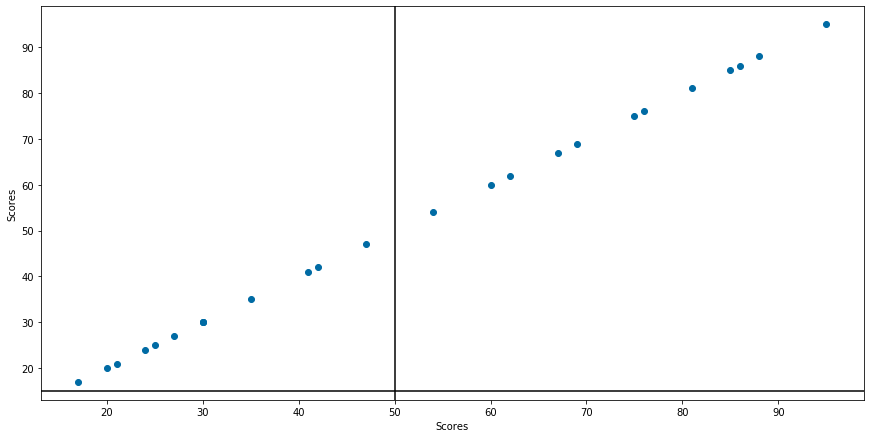

In [117]:
numeric_scatter3(df)

<Figure size 864x432 with 0 Axes>

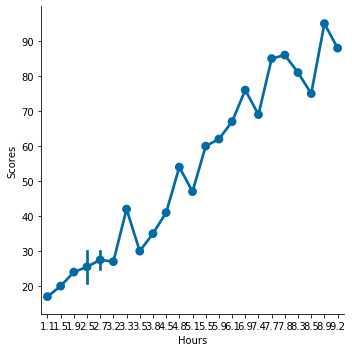

<Figure size 864x432 with 0 Axes>

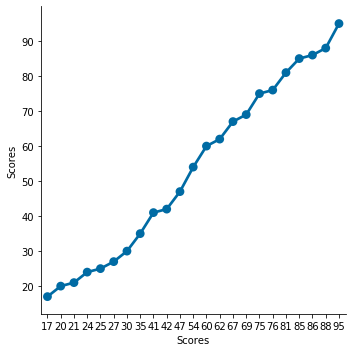

In [118]:
numeric_factorplot(df)

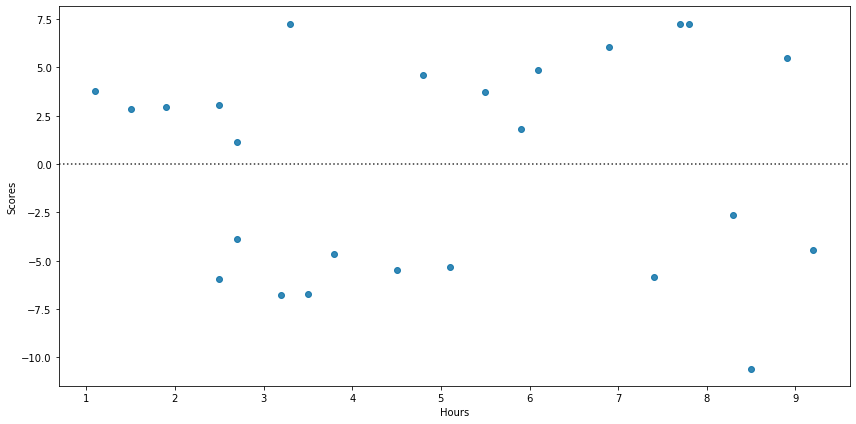

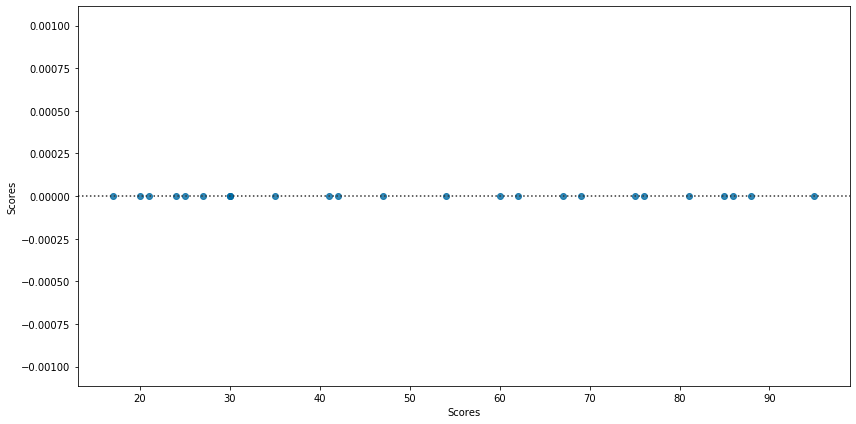

In [119]:
numeric_residplot(df)

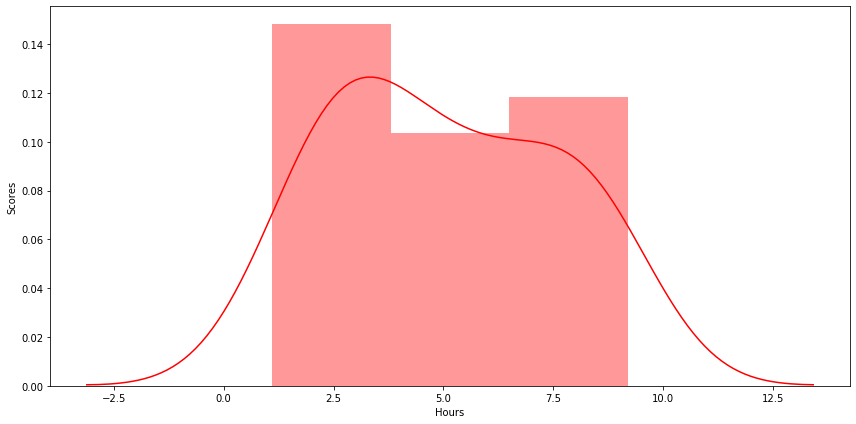

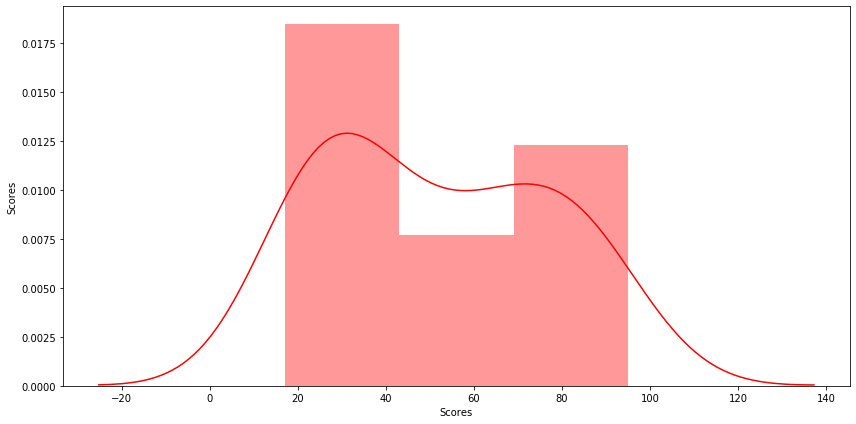

In [120]:
numeric_dis(df)

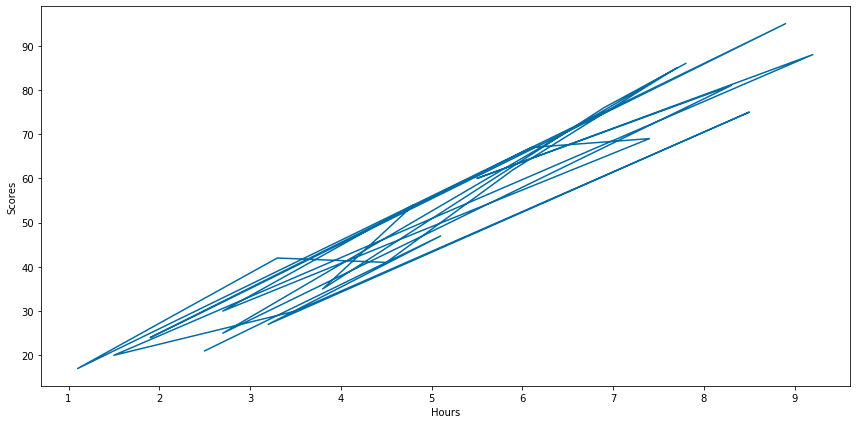

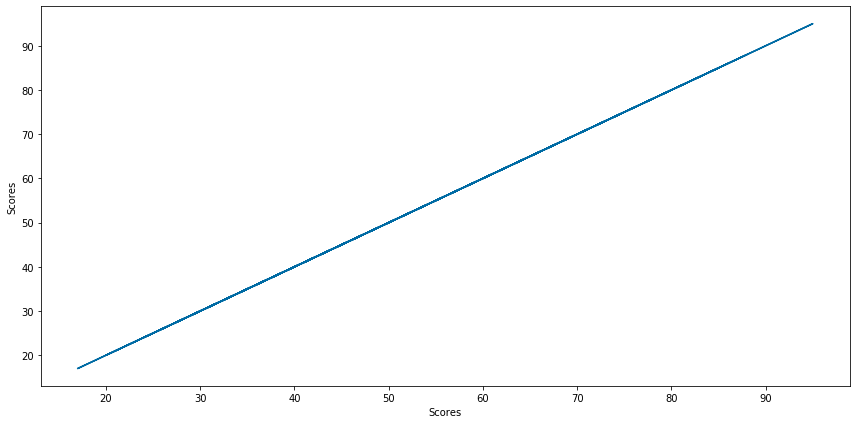

In [121]:
numeric_pandas_plot(df)

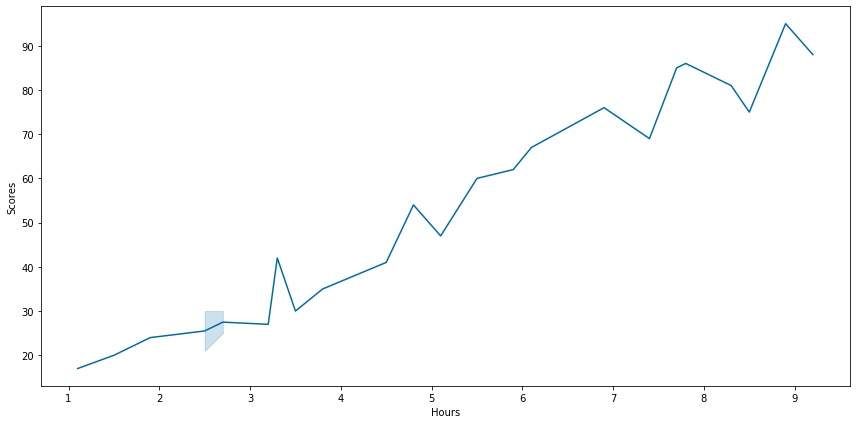

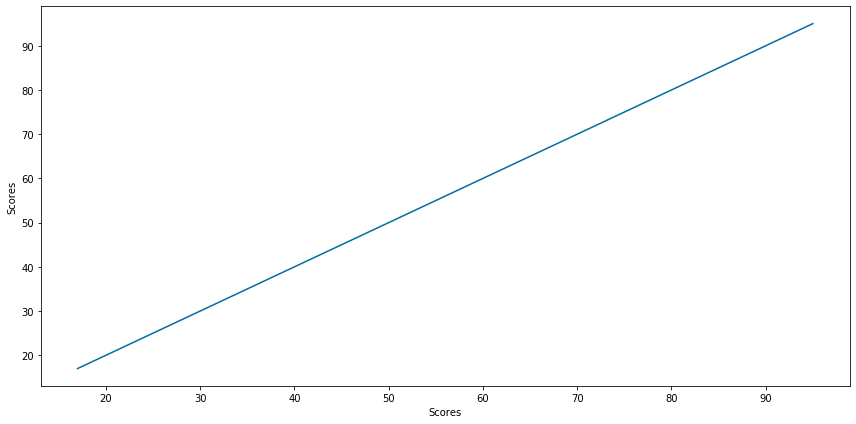

In [122]:
numeric_lineplot(df)

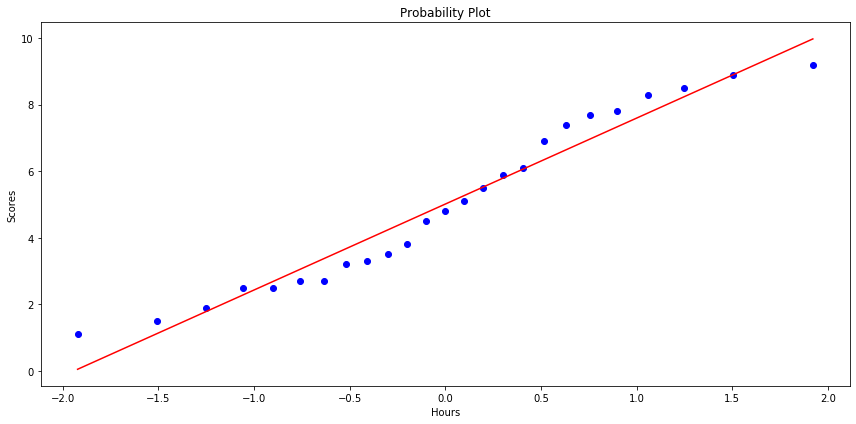

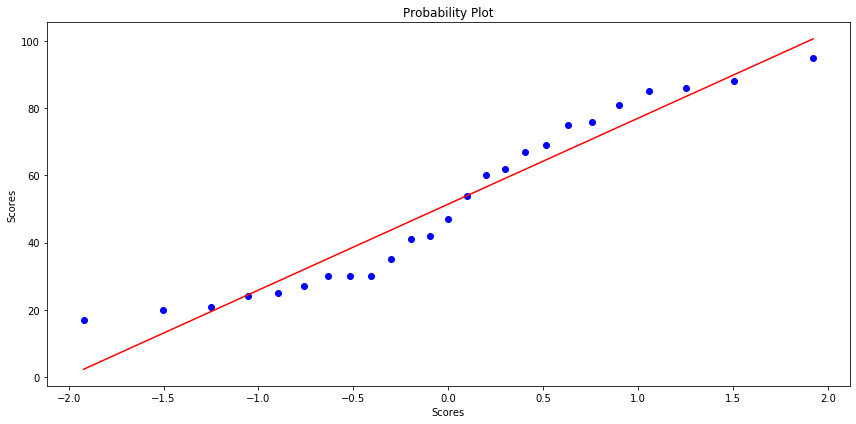

In [123]:
numeric_scipy_prob(df)

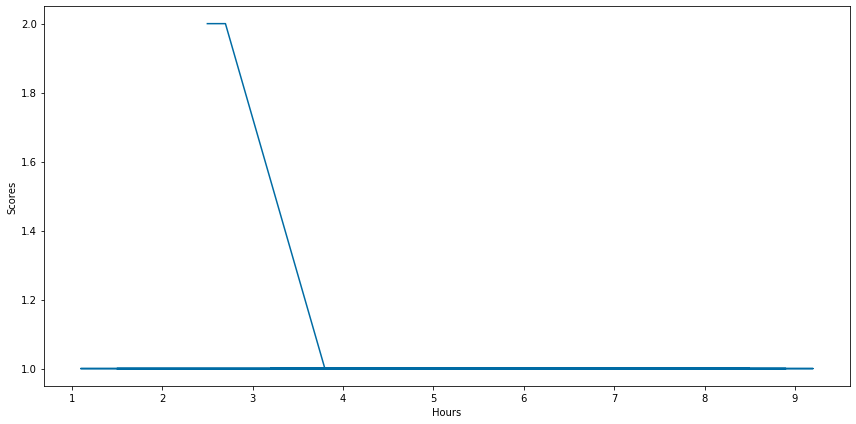

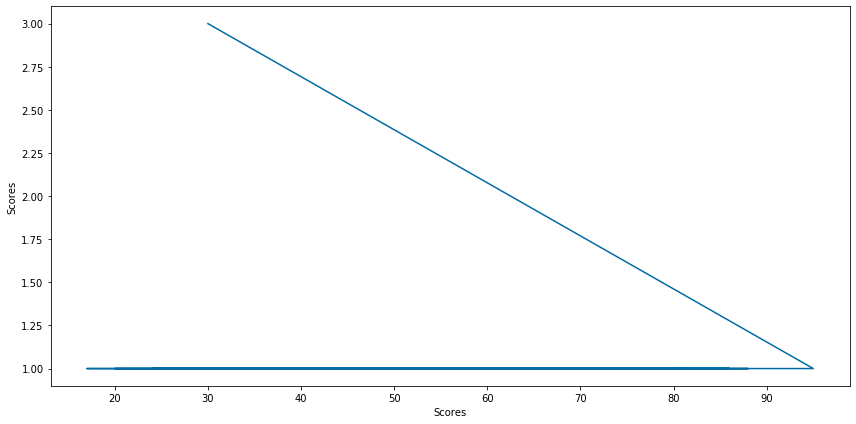

In [124]:
numeric_value_counts(df)

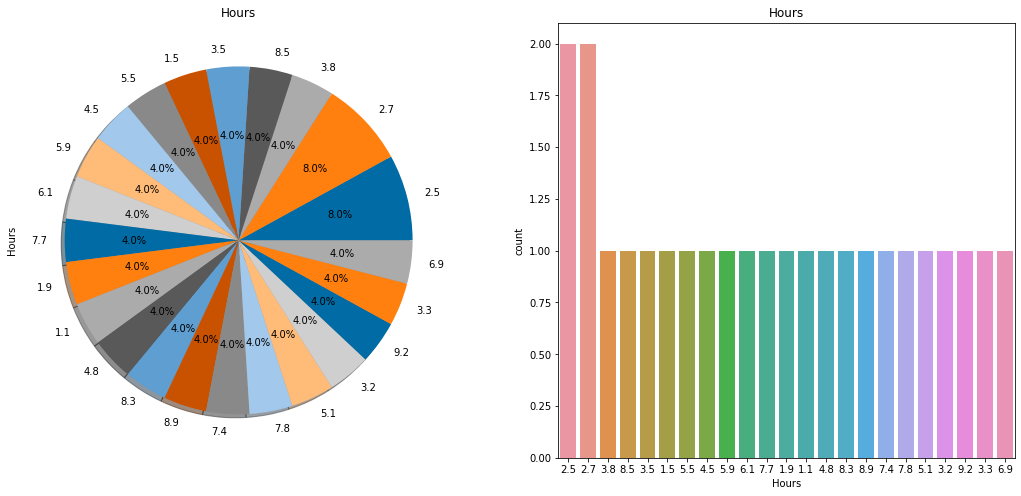

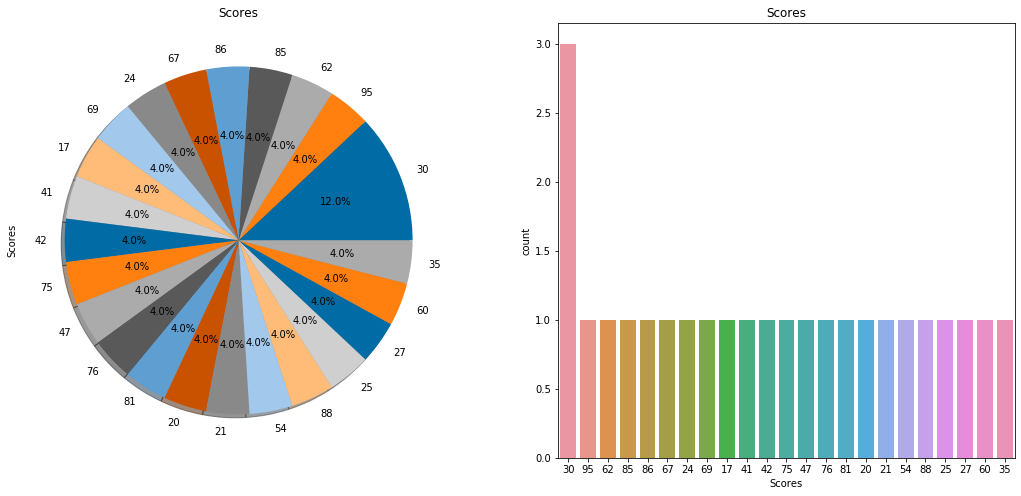

In [125]:
numeric_pie_and_bar(df)

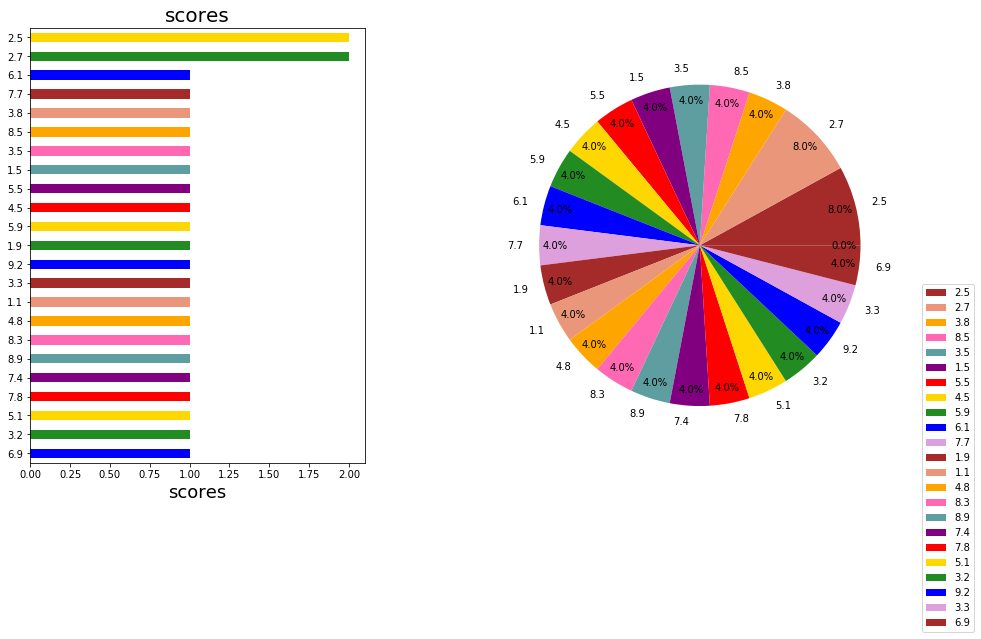

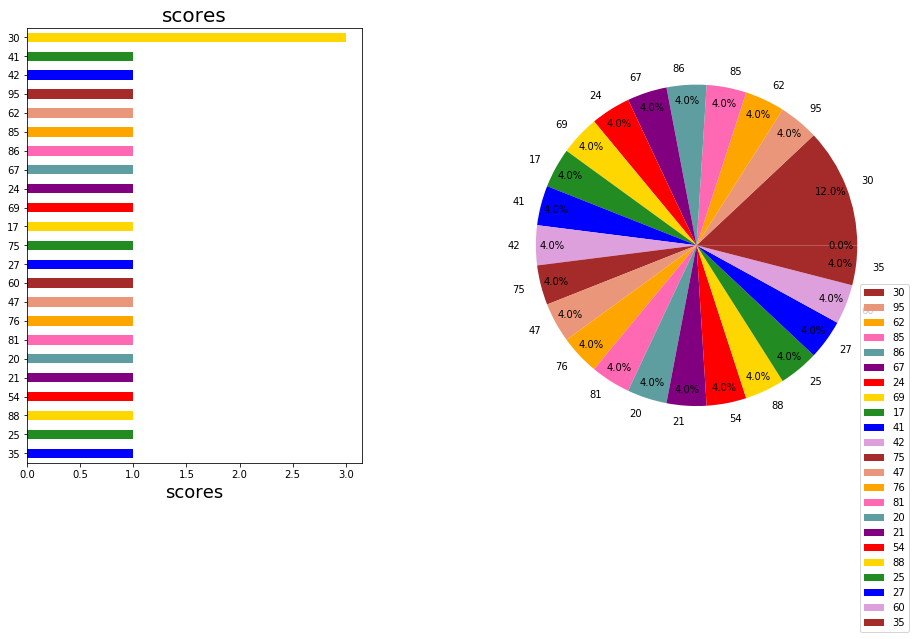

In [126]:
numeric_barh_and_pie(df)

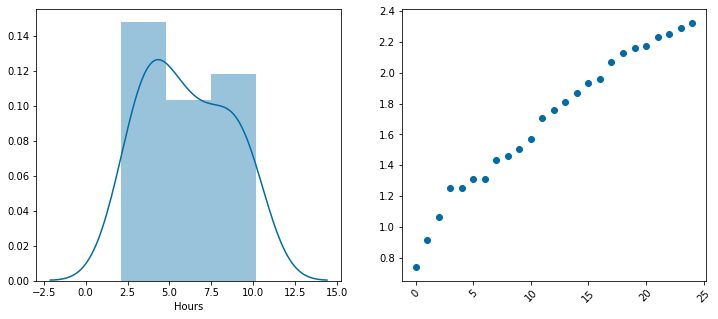

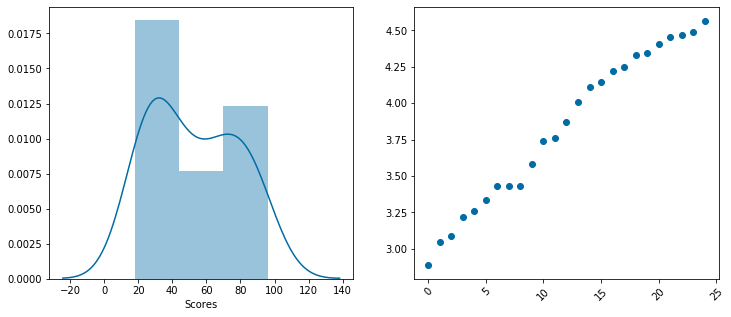

In [127]:
numeric_sub_plot(df)

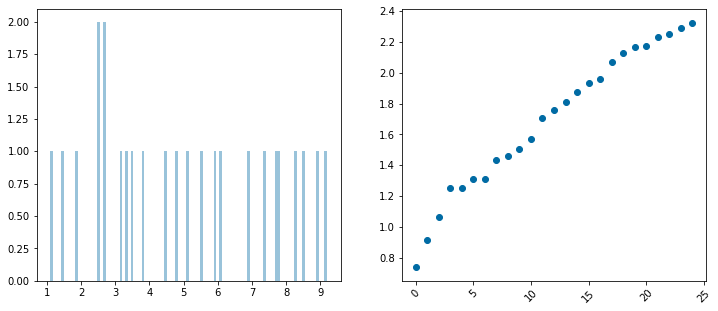

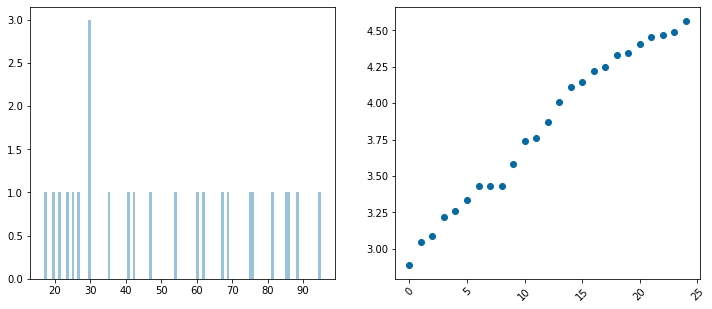

In [128]:
numeric_sub_plot2(df)

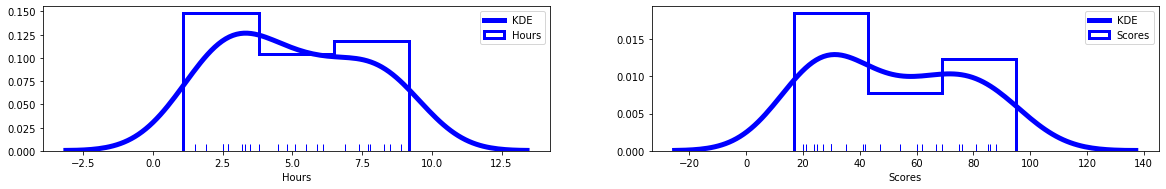

In [129]:
numeric_displot_and_kde(df)

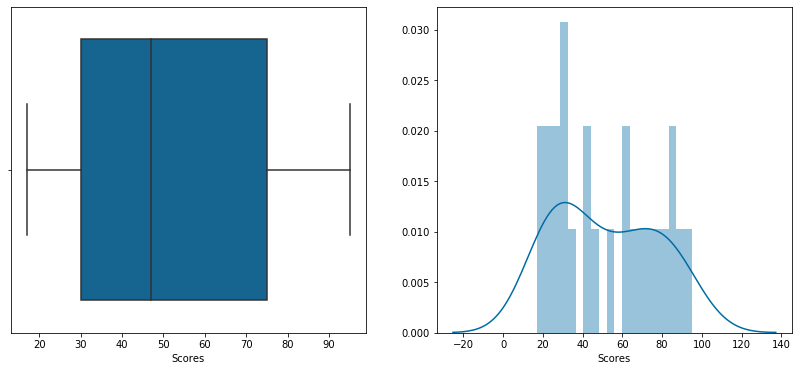

In [130]:
target_subplot(df)

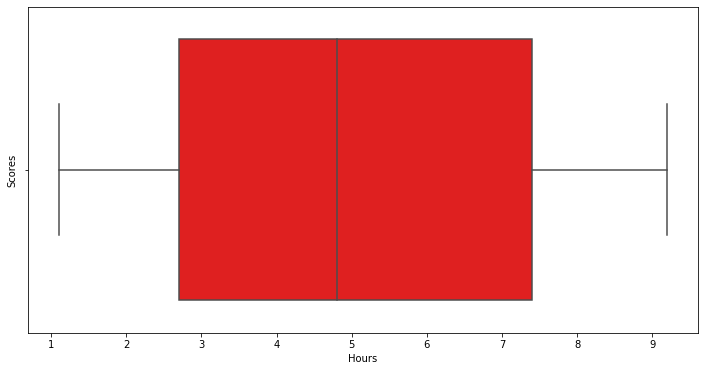

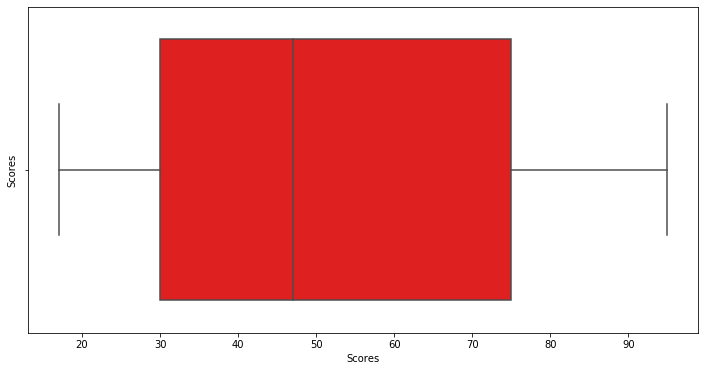

In [131]:
for col in df2.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df2,x = col,color='Red')
    plt.xlabel(col)
    plt.ylabel('Scores')

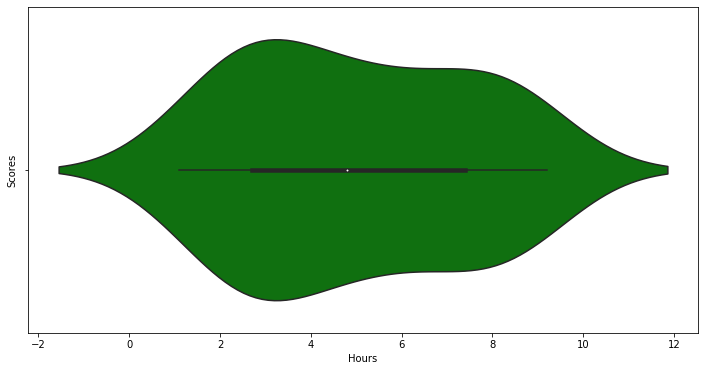

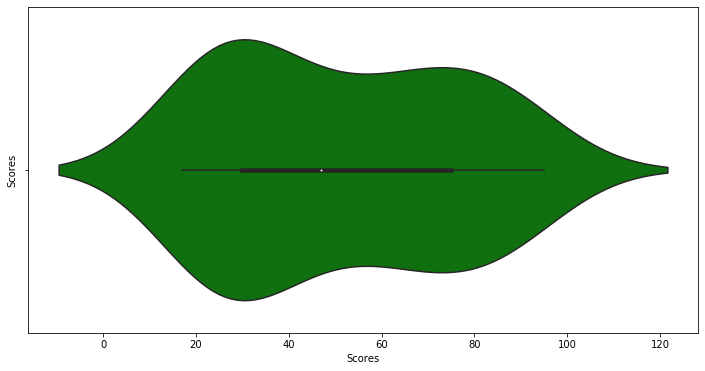

In [132]:
for col in df2.columns:
    plt.figure(figsize=(12,6))
    sns.violinplot(data=df2,x = col,color='green')
    plt.xlabel(col)
    plt.ylabel('Scores')

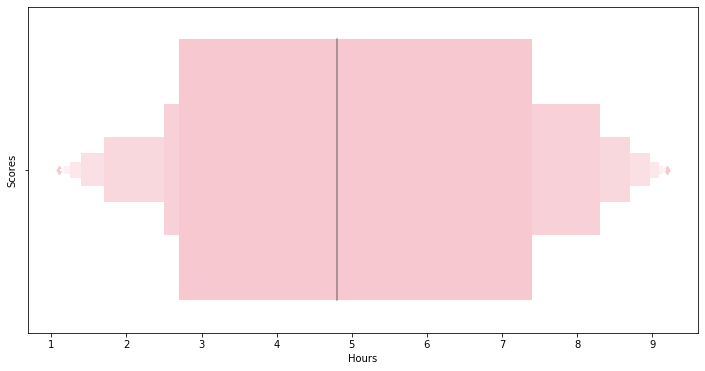

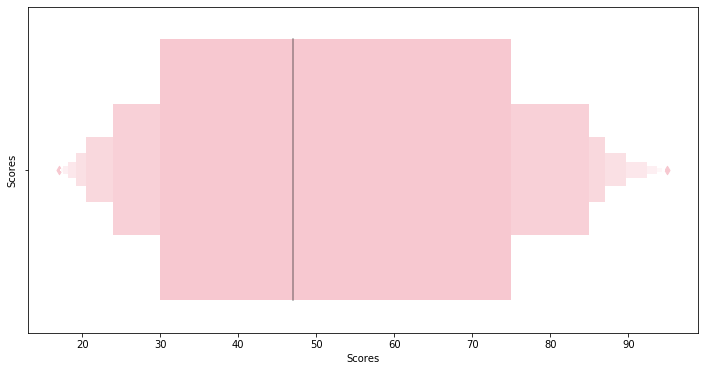

In [133]:
for col in df2.columns:
    plt.figure(figsize=(12,6))
    sns.boxenplot(data=df2,x = col,color='pink')
    plt.xlabel(col)
    plt.ylabel('Scores')

In [198]:
df3.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [206]:
trace1 = go.Scatter(
                    x = df3.Hours,
                    y = df3.Scores,
                    mode = "lines",
                    name = "Hours scores",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                )




data = [trace1]
layout = go.Layout(title = 'Hours and Scores')
fig = dict(data = data, layout = layout)
iplot(fig)

# Data PreProcessing & Feature Engineering

In [134]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [135]:
df.shape

(25, 2)

In [136]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hours      4.7
Scores    45.0
dtype: float64


In [137]:
# Remove Outlers

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [138]:
df.shape

(25, 2)

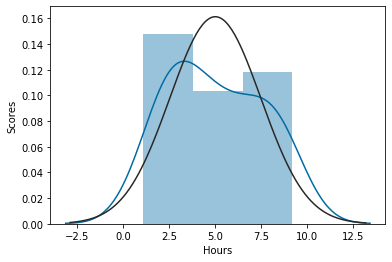

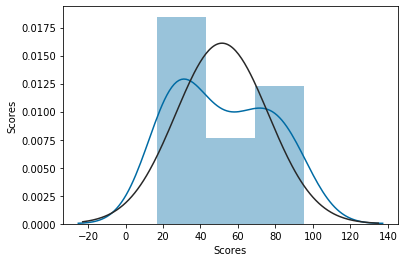

In [139]:
for col in df.columns:
    sns.distplot(df[col],fit = norm)
    plt.xlabel(col)
    plt.ylabel('Scores')
    plt.show()

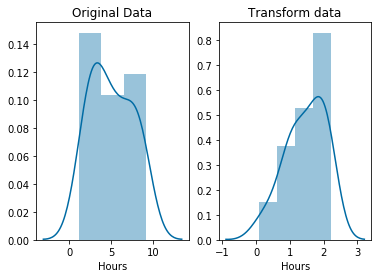

In [140]:
# log transform


original_data = df['Hours']

transformed = np.log(original_data)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

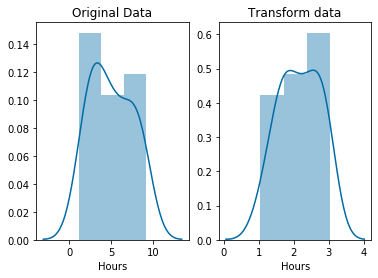

In [141]:
# Square Root Transformation

original_data = df['Hours']

transformed = original_data**(.5)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

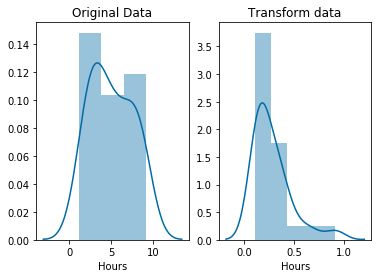

In [142]:
# Reciprocal Transformation

original_data = df['Hours']

transformed = recip = 1/original_data

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

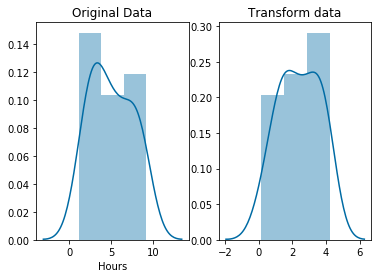

In [143]:
# boxcox

original_data = df['Hours']

transformed = stats.boxcox(original_data)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

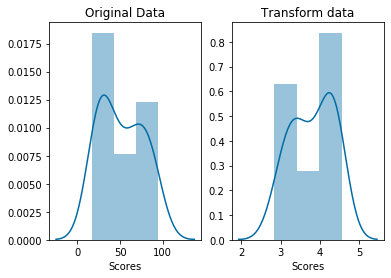

In [144]:
# log transform


original_data = df['Scores']

transformed = np.log(original_data)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

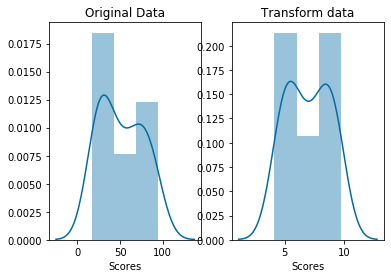

In [145]:
# Square Root Transformation

original_data = df['Scores']

transformed = original_data**(.5)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

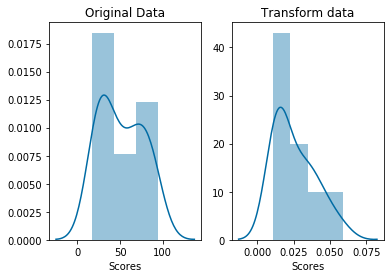

In [146]:
# Reciprocal Transformation

original_data = df['Scores']

transformed = recip = 1/original_data

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

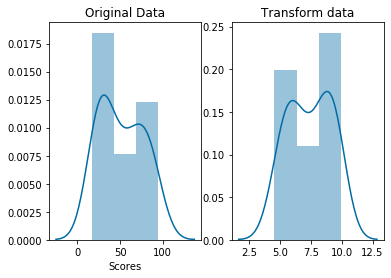

In [147]:
# boxcox

original_data = df['Scores']

transformed = stats.boxcox(original_data)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(transformed, ax=ax[1])
ax[1].set_title("Transform data");

In [148]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

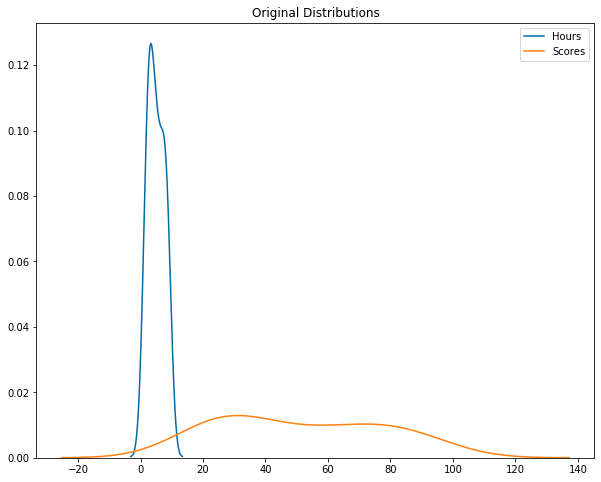

In [149]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('Original Distributions')

sns.kdeplot(df['Hours'], ax=ax1)
sns.kdeplot(df['Scores'], ax=ax1)

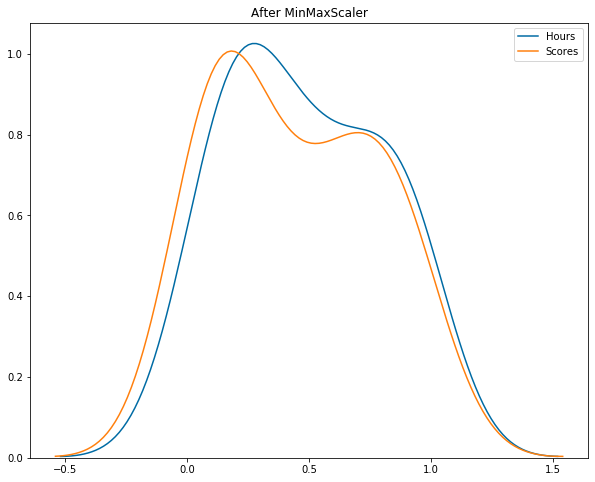

In [150]:
# Min-Max Scaling

col_names = list(df[num].columns)
scalar = MinMaxScaler()
df_mm = scalar.fit_transform(df3[num])

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['Hours'], ax=ax1)
sns.kdeplot(df_mm['Scores'], ax=ax1);

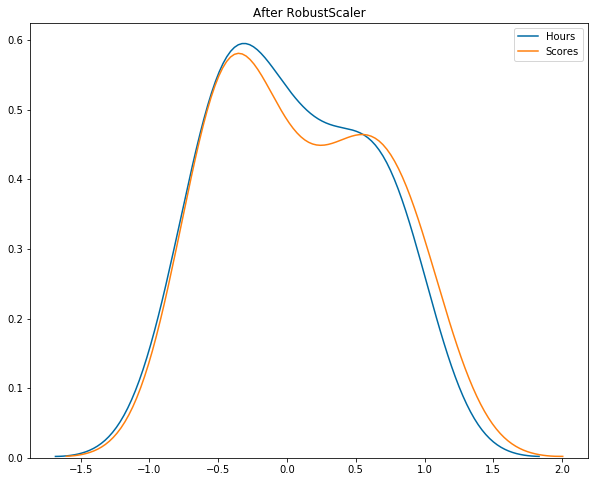

In [151]:
# Robust Scaling

scalar = RobustScaler()
df_r = scalar.fit_transform(df3[num])

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['Hours'], ax=ax1)
sns.kdeplot(df_r['Scores'], ax=ax1);

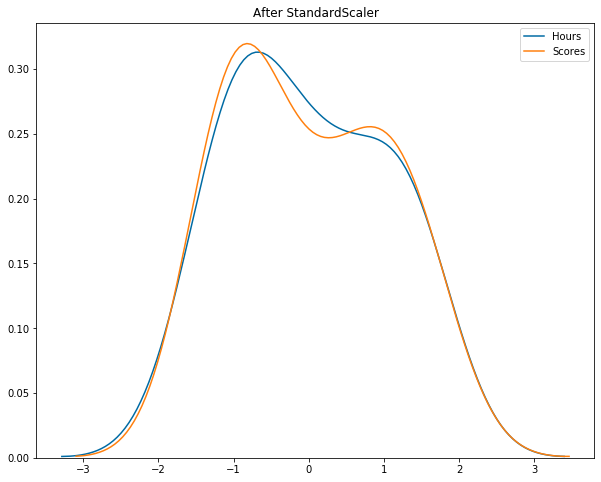

In [152]:
# Standard Scaling

scalar = StandardScaler()
df_s = scalar.fit_transform(df3[num])

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')
 
sns.kdeplot(df_s['Hours'], ax=ax1)
sns.kdeplot(df_s['Scores'], ax=ax1);

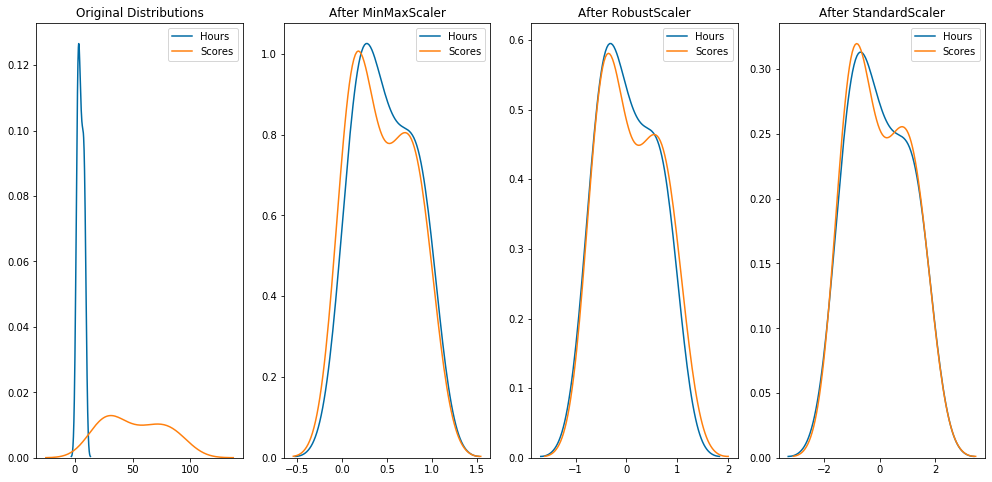

In [153]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(17,8))

ax0.set_title('Original Distributions')
sns.kdeplot(df['Hours'], ax=ax0)
sns.kdeplot(df['Scores'], ax=ax0)


ax1.set_title('After MinMaxScaler')
sns.kdeplot(df_mm['Hours'], ax=ax1)
sns.kdeplot(df_mm['Scores'], ax=ax1)


ax2.set_title('After RobustScaler')
sns.kdeplot(df_r['Hours'], ax=ax2)
sns.kdeplot(df_r['Scores'], ax=ax2)


ax3.set_title('After StandardScaler')
sns.kdeplot(df_s['Hours'], ax=ax3)
sns.kdeplot(df_s['Scores'], ax=ax3);

In [154]:
Scalar = StandardScaler()

# Model Building

In [155]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [156]:
X = df[['Hours']]

In [157]:
y = df['Scores']

In [158]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print('\n Split_data_shapes')
print('\nX_train:\n',  X_train.shape)
print('\ny_train:\n',  y_train.shape)
print('\nX_test:\n',   X_train.shape)
print('\ny_test:\n',   X_test.shape)


 Split_data_shapes

X_train:
 (20, 1)

y_train:
 (20,)

X_test:
 (20, 1)

y_test:
 (5, 1)


In [159]:
print(y_train.mean())
print("\n ")
print(y_test.mean())

55.15

 
36.8


In [160]:
# Functions Which Displays The Scores for models

def rmsle(y_test, pred):
    return np.sqrt(mean_squared_log_error(y_test, pred))

def show_All_scores(model):
    train = model.predict(X_train)
    test  = model.predict(X_test)
   
    print("\n Training R^2 \n",r2_score(y_train, train))
    print("\n \t Testing R^2 \n",r2_score(y_test, test))
    
    print("\n Training Mean_Absolute_Error \n",mean_absolute_error(y_train, train))
    print("\n \t Testing Mean_Absolute_Error \n", mean_absolute_error(y_test, test))
    
    print("\n Training Mean_Squared_Error \n", mean_squared_error(y_train, train))
    print("\n \t Testing Mean_Squared_Error \n", mean_squared_error(y_test, test))
    
    print("\n Training Root_Mean_Squared_Error \n", np.sqrt(mean_squared_error(y_train, train)))
    print("\n \t Testing Root_Mean_Squared_Error \n", np.sqrt(mean_squared_error(y_test, test)))
    
    print("\n Training Mean_Squared_Log_Error \n",rmsle(y_train, train))
    print("\n \t Testing Mean_Squared_Log_Error \n",rmsle(y_test, test))

def show_r2_scores(model):
    train = model.predict(X_train)
    test  = model.predict(X_test)
    print("\n Training R^2 \n", r2_score(y_train, train))
    print("\n \t Testing R^2 \n",  r2_score(y_test, test))
    
def show_mean_absolute_error_scores(model):
    train = model.predict(X_train)
    test  = model.predict(X_test)
    print("\n Training Mean_Absolute_Error \n", mean_absolute_error(y_train, train))
    print("\n \t Testing Mean_Absolute_Error \n", mean_absolute_error(y_test, test))
    
def show_mean_squared_error_scores(model):
    train = model.predict(X_train)
    test  = model.predict(X_test) 
    print("\n Training Mean_Squared_Error \n", mean_squared_error(y_train, train))
    print("\n \t Testing Mean_Squared_Error \n", mean_squared_error(y_test, test))
    
def show_Root_mean_squared_error_scores(model):
    train = model.predict(X_train)
    test  = model.predict(X_test) 
    print("\n Training Root_Mean_Squared_Error \n", np.sqrt(mean_squared_error(y_train, train)))
    print("\n \t Testing Root_Mean_Squared_Error \n", np.sqrt(mean_squared_error(y_test, test)))
    
def show_mean_squared_log_error_scores(model):
    train = model.predict(X_train)
    test  = model.predict(X_test) 
    print("\n Training mean_squared_log_error \n", rmsle(y_train, train)),
    print("\n \t Testing mean_squared_log_error \n", rmsle(y_test, test))
    
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(10), desc = "Regression Validations func"):
    time.sleep(0.6)
              
print("Regression Validation Function")
print(" ")


Regression Validation Function
 


In [161]:
# This Functions are used to print and Disply the scores 

# summary for all the defined score
def print_summary(model,show_All_scores):
    print('\n \t Model:\n',model)
    show_All_scores(model)
    
# summary for the r2 score
def print_summary(model,show_r2_scores):
    print('\n \t Model:\n',model)
    show_r2_scores(model)
    
# summary for the mean_absolute_error 
def print_summary(model,show_mean_absolute_error_scores):
    print('\n \t Model:\n',model)
    show_mean_absolute_error_scores(model)  
    
    
# summary for the mean_square_error score
def print_summary(model,show_mean_squared_error_scores):
    print('\n \t Model:\n',model)
    show_mean_squared_error_scores(model)
    
# summary for the root mean_square_error score
def print_summary(model,Root_show_mean_squared_error_scores):
    print('\n \t Model:\n',model)
    show_Root_mean_squared_error_scores(model)
    
# summary for thr mean_squared_log_error_scores
def print_summary(model,show_mean_squared_log_error_scores):
    print('\n \t Model:\n',model)
    show_mean_squared_log_error_scores(model)    


In [162]:
lr = LinearRegression()

np.random.seed(42)

lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print("r2_score",r2_score(y_test,pred))
print(" ")
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print(" ")
print("mean_squared_error",mean_squared_error(y_test,pred))
print(" ")
print("Root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9050356232459791
 
mean_absolute_error 4.140342096254413
 
mean_squared_error 20.641456931253995
 
Root_mean_squared_error 4.543287018366107


In [163]:
lr = LinearRegression()
np.random.seed(42)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)


# stasts Model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.59e-13
Time:                        01:48:03   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.530      -4.536       8.515
Hours          9.8354      0.521     18.886      0.000       8.741      10.930
==============================================================================
Omnibus:                        7.040   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.943
Skew:                          -0.248   Prob(JB):                        0.379
Kurtosis:                       1.556   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Building with diff Models

In [164]:
models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regression':RandomForestRegressor(),
    'Svm':SVR(),
    'Knn':KNeighborsRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
     "XGBoostRegressor":XGBRegressor(),
     "LGBoostRegressor":LGBMRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
}

results = {}

In [165]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = cross_val_score(model,X_train,y_train).mean()
    
results

{'Linear Regression': 0.9152270744716321,
 'Decision Tree': 0.821720723086254,
 'Random Forest Regression': 0.8490625015108283,
 'Svm': -2.372383369856169,
 'Knn': 0.5544246548878283,
 'Gradient Boosting': 0.8220319333304028,
 'XGBoostRegressor': 0.8157926977355453,
 'LGBoostRegressor': -1.9130961580119523,
 'AdaBoostRegressor': 0.8388315112711434}

In [166]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # Using Display print Functions To get all scores for each model
    
    print_summary(model,show_All_scores)


 	 Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 Training R^2 
 0.9519568836485192

 	 Testing R^2 
 0.9050356232459791

 Training Mean_Absolute_Error 
 5.231500478084828

 	 Testing Mean_Absolute_Error 
 4.140342096254413

 Training Mean_Squared_Error 
 31.017957102215707

 	 Testing Mean_Squared_Error 
 20.641456931253995

 Training Root_Mean_Squared_Error 
 5.569376724752574

 	 Testing Root_Mean_Squared_Error 
 4.543287018366107

 Training Mean_Squared_Log_Error 
 0.12875990369589152

 	 Testing Mean_Squared_Log_Error 
 0.1386944844455528

 	 Model:
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

 Training R^2 
 0.9968635165013882

 	 Testing R^2 
 0.7156790577843211

In [167]:
def all_algorithms_with_default_parameters():
    models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regression':RandomForestRegressor(),
    'Svm':SVR(),
    "KNN":KNeighborsRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
     "XGBoostRegressor":XGBRegressor(),
     "LGBoostRegressor":LGBMRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()}
    mn,r2score,MAE,MSE,RMSE,MSLE = [],[],[],[],[],[]
    
    for model_name,model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mn.append(model_name)
        r2score.append(r2_score(y_test,pred))
        MAE.append(mean_absolute_error(y_test,pred))
        MSE.append(mean_squared_error(y_test,pred))
        RMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
        MSLE.append(np.sqrt(mean_squared_log_error(y_test, pred)))
        print('Done with ', model_name)
        
        
    results = pd.DataFrame()
    results['Model'] = mn
    results['R^2 score'] = r2score
    results['Mean Absolute Error'] = MAE
    results['Mean Squared Error'] = MSE
    results['Root Mean Squared Error'] = RMSE
    results['Mean Squared Log Error'] = MSLE
    results = results.sort_values(by=['R^2 score'],ascending=False)
    return results.style.background_gradient()

In [168]:
all_algorithms_with_default_parameters()

Done with  Linear Regression
Done with  Decision Tree
Done with  Random Forest Regression
Done with  Svm
Done with  KNN
Done with  Gradient Boosting
Done with  XGBoostRegressor
Done with  LGBoostRegressor
Done with  AdaBoostRegressor


,Model,R^2 score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Squared Log Error
0,Linear Regression,0.905036,4.140342,20.641457,4.543287,0.138694
4,KNN,0.782039,4.800000,47.376000,6.883023,0.206587
2,Random Forest Regression,0.755916,5.620000,53.054000,7.283818,0.211619
8,AdaBoostRegressor,0.752427,5.650000,53.812500,7.335700,0.199654
5,Gradient Boosting,0.721150,6.537157,60.610865,7.785298,0.228015
1,Decision Tree,0.715679,6.600000,61.800000,7.861298,0.231054
6,XGBoostRegressor,0.709307,6.799301,63.185083,7.948905,0.233875
3,Svm,-1.381184,19.551685,517.574080,22.750255,0.594820
7,LGBoostRegressor,-1.549147,21.090000,554.082500,23.538957,0.606977


# Ploting Model Scores and Error

                              Score
Model                              
LinearRegression           0.905036
RandomForestRegressor      0.761870
DecisionTreeRegressor      0.715679
GradientBoostingRegressor  0.721150
KNeighborsRegressor        0.782039
SVR                       -1.381184
XGBRegressor               0.709307
LGBMRegressor             -1.549147


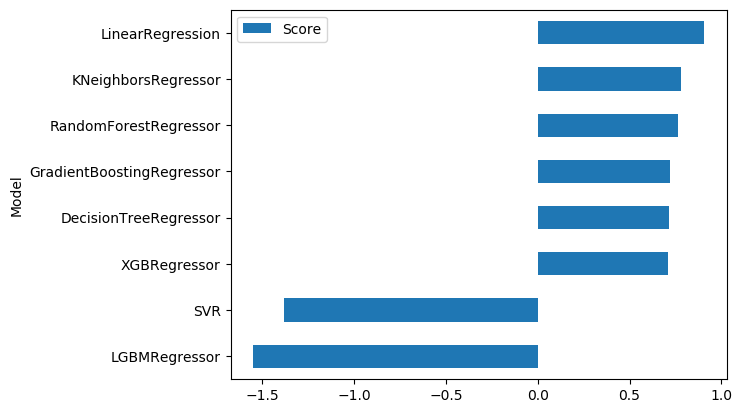

In [169]:
plt.style.use("default")


# Checking r2 score and ploting

Regression = [LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(),
    XGBRegressor(),
    LGBMRegressor()]

names = []
scores = []

for clf in Regression:
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(r2_score(y_test,pred))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
print(score_df)


score_df.sort_values('Score',inplace=True)
score_df.plot(kind='barh',y='Score');

                               Score
Model                               
LinearRegression            4.140342
RandomForestRegressor       5.674000
DecisionTreeRegressor       6.600000
GradientBoostingRegressor   6.537157
KNeighborsRegressor         4.800000
SVR                        19.551685
XGBRegressor                6.799301


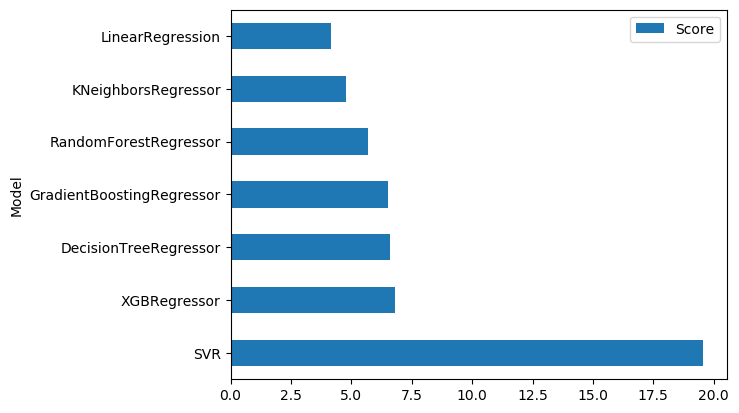

In [170]:

# Ploting The Error 

# Checking Which Model Has Lower Error (Mean Absolute Error)

Regression = [LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(),
    XGBRegressor()]

names = []
scores = []

for clf in Regression:
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(mean_absolute_error(y_test,pred))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
print(score_df)

score_df.sort_values('Score',inplace=True,ascending = False)
score_df.plot(kind='barh',y='Score');

                               Score
Model                               
LinearRegression            4.543287
RandomForestRegressor       6.898152
DecisionTreeRegressor       7.861298
GradientBoostingRegressor   7.785298
KNeighborsRegressor         6.883023
SVR                        22.750255
XGBRegressor                7.948905


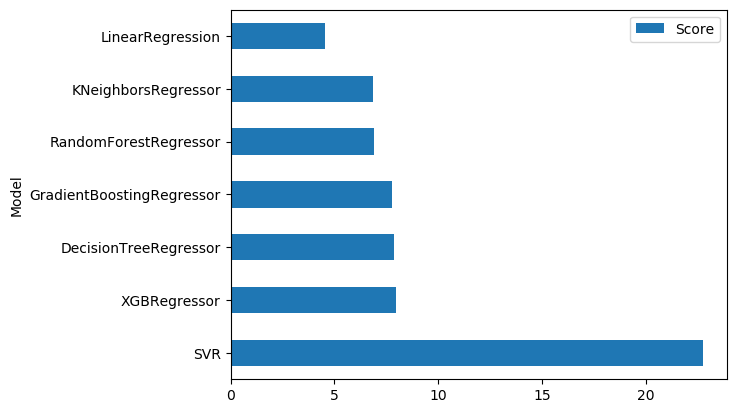

In [171]:

# Ploting The Error 

# Checking Which Model Has Lower Error (RMSE)

Regression = [LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(),
    XGBRegressor()]

names = []
scores = []

for clf in Regression:
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(np.sqrt(mean_squared_error(y_test,pred)))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
print(score_df)

score_df.sort_values('Score',inplace=True,ascending = False)
score_df.plot(kind='barh',y='Score');

# Model Selection and ploting

In [172]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

show_All_scores(lr)


 Training R^2 
 0.9519568836485192

 	 Testing R^2 
 0.9050356232459791

 Training Mean_Absolute_Error 
 5.231500478084828

 	 Testing Mean_Absolute_Error 
 4.140342096254413

 Training Mean_Squared_Error 
 31.017957102215707

 	 Testing Mean_Squared_Error 
 20.641456931253995

 Training Root_Mean_Squared_Error 
 5.569376724752574

 	 Testing Root_Mean_Squared_Error 
 4.543287018366107

 Training Mean_Squared_Log_Error 
 0.12875990369589152

 	 Testing Mean_Squared_Log_Error 
 0.1386944844455528


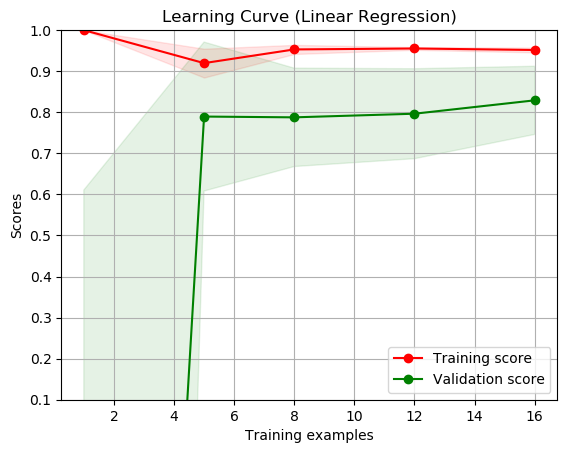

In [173]:
title = "Learning Curve (Linear Regression)"
cv = 5
lr = LinearRegression()
plot_learning_curve(lr, title, X_train, 
                    y_train, ylim=(0.1, 1.0), cv=cv, n_jobs=-1);

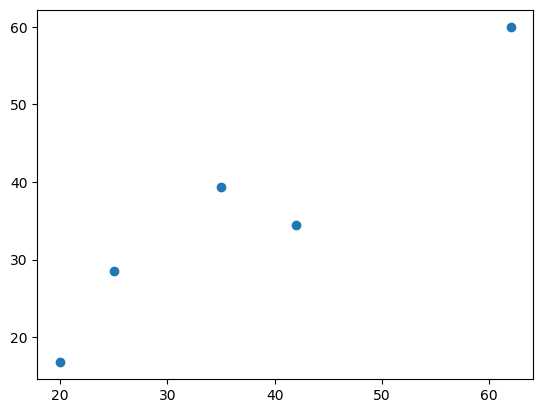

In [174]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

plt.scatter(y_test,pred)

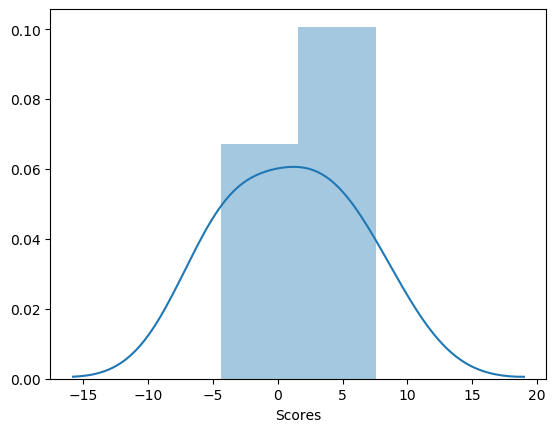

In [175]:
sns.distplot(y_test-pred);

<Figure size 1300x500 with 0 Axes>

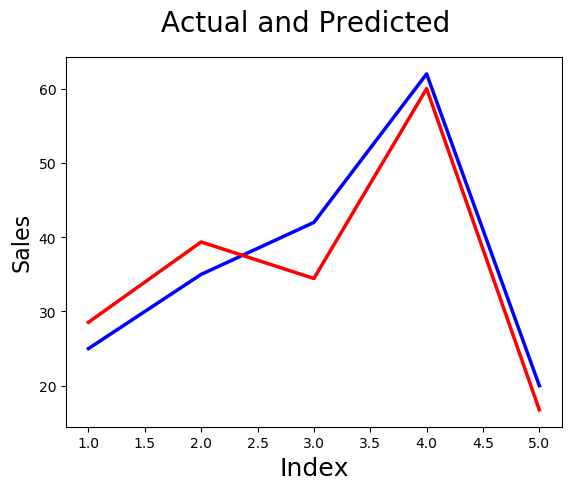

In [176]:
plt.figure(figsize=(13,5))
c = [i for i in range(1,6,1)]
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)
plt.show()

Text(0, 0.5, 'ytest-pred')

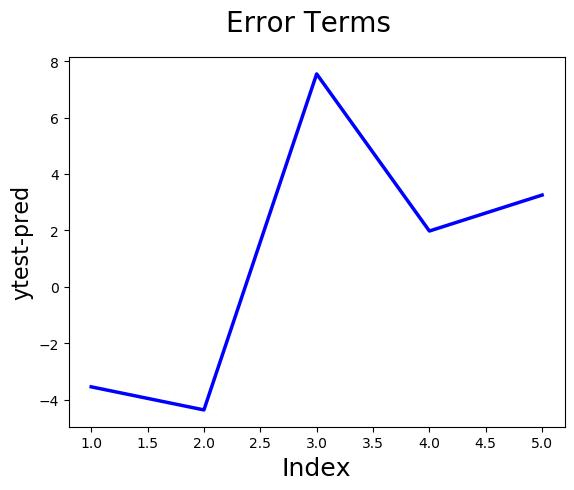

In [177]:
fig = plt.figure()
c = [i for i in range(1,6,1)]
plt.plot(c, y_test - pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-pred', fontsize=16) 

Text(0, 0.5, 'Index')

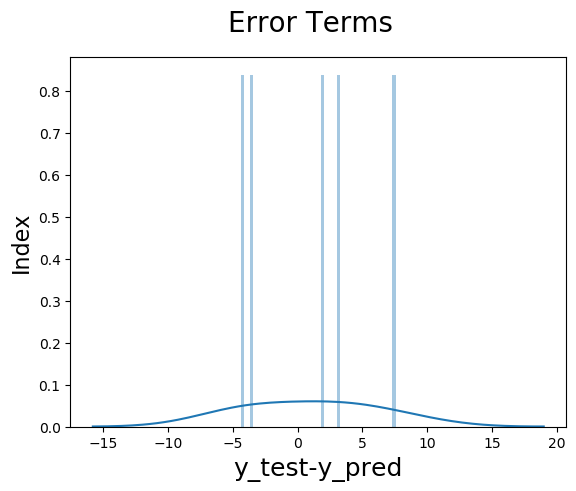

In [178]:
fig = plt.figure()
sns.distplot((y_test-pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16)

In [179]:
lr = LinearRegression()

np.random.seed(42)

lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print("r2_score",r2_score(y_test,pred))
print(" ")
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print(" ")
print("mean_squared_error",mean_squared_error(y_test,pred))
print(" ")
print("Root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9050356232459791
 
mean_absolute_error 4.140342096254413
 
mean_squared_error 20.641456931253995
 
Root_mean_squared_error 4.543287018366107


# Testing New Data

In [180]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.96728365185982


In [181]:
hours = [[8.65]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[8.65]]
Predicted Score = 87.06601702218077


In [182]:
hours = [[1.30]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[1.3]]
Predicted Score = 14.7755008086126


In [183]:
hours = [[2]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[2]]
Predicted Score = 21.660311876571473


In [184]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.callbacks import EarlyStopping

In [185]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [186]:
X = df[['Hours']].values

In [187]:
y = df['Scores'].values

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [189]:
model = Sequential()
model.add(Dense(100,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 17 samples, validate on 8 samples
Epoch 1/100
17/17 [==============================] - 1s 84ms/sample - loss: 3456.5337 - val_loss: 2578.8748
Epoch 2/100
17/17 [==============================] - 0s 117us/sample - loss: 3430.1150 - val_loss: 2558.8691
Epoch 3/100
17/17 [==============================] - 0s 176us/sample - loss: 3402.9641 - val_loss: 2539.0166
Epoch 4/100
17/17 [==============================] - 0s 177us/sample - loss: 3375.9744 - val_loss: 2519.3599
Epoch 5/100
17/17 [==============================] - 0s 116us/sample - loss: 3349.3064 - val_loss: 2499.9497
Epoch 6/100
17/17 [==============================] - 0s 232us/sample - loss: 3322.9673 - val_loss: 2482.6562
Epoch 7/100
17/17 [==============================] - 0s 176us/sample - loss: 3299.3374 - val_loss: 2464.9316
Epoch 8/100
17/17 [==============================] - 0s 117us/sample - loss: 

Epoch 73/100
17/17 [==============================] - 0s 176us/sample - loss: 42.1235 - val_loss: 27.9027
Epoch 74/100
17/17 [==============================] - 0s 177us/sample - loss: 35.9770 - val_loss: 24.3332
Epoch 75/100
17/17 [==============================] - 0s 176us/sample - loss: 33.2190 - val_loss: 22.9383
Epoch 76/100
17/17 [==============================] - 0s 176us/sample - loss: 33.2633 - val_loss: 23.2359
Epoch 77/100
17/17 [==============================] - 0s 116us/sample - loss: 35.4049 - val_loss: 24.7184
Epoch 78/100
17/17 [==============================] - 0s 117us/sample - loss: 38.9651 - val_loss: 26.9287
Epoch 79/100
17/17 [==============================] - 0s 117us/sample - loss: 43.3113 - val_loss: 29.4536
Epoch 80/100
17/17 [==============================] - 0s 117us/sample - loss: 47.8744 - val_loss: 31.9412
Epoch 81/100
17/17 [==============================] - 0s 117us/sample - loss: 52.1728 - val_loss: 34.1142
Epoch 82/100
17/17 [==========================

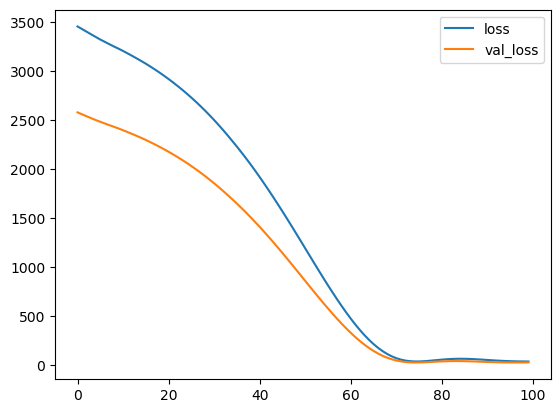

In [190]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot();

In [191]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [192]:
model = Sequential()

model.add(Dense(100,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse',metrics = ['mse'])

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[early_stop],batch_size = 128)

Train on 17 samples, validate on 8 samples
Epoch 1/100
17/17 [==============================] - 0s 9ms/sample - loss: 3543.1038 - mean_squared_error: 3543.1038 - val_loss: 2647.4443 - val_mean_squared_error: 2647.4443
Epoch 2/100
17/17 [==============================] - 0s 176us/sample - loss: 3524.1462 - mean_squared_error: 3524.1462 - val_loss: 2632.9131 - val_mean_squared_error: 2632.9131
Epoch 3/100
17/17 [==============================] - 0s 176us/sample - loss: 3504.4526 - mean_squared_error: 3504.4526 - val_loss: 2617.8252 - val_mean_squared_error: 2617.8252
Epoch 4/100
17/17 [==============================] - 0s 119us/sample - loss: 3483.9788 - mean_squared_error: 3483.9788 - val_loss: 2602.8704 - val_mean_squared_error: 2602.8704
Epoch 5/100
17/17 [==============================] - 0s 176us/sample - loss: 3463.6841 - mean_squared_error: 3463.6841 - val_loss: 2587.8350 - val_mean_squared_error: 2587.8350
Epoch 6/100
17/17 [==============================] - 0s 235us/sample - los

Epoch 47/100
17/17 [==============================] - 0s 235us/sample - loss: 2252.3591 - mean_squared_error: 2252.3591 - val_loss: 1666.6746 - val_mean_squared_error: 1666.6746
Epoch 48/100
17/17 [==============================] - 0s 176us/sample - loss: 2199.8267 - mean_squared_error: 2199.8267 - val_loss: 1626.3694 - val_mean_squared_error: 1626.3694
Epoch 49/100
17/17 [==============================] - 0s 235us/sample - loss: 2145.6926 - mean_squared_error: 2145.6926 - val_loss: 1584.9578 - val_mean_squared_error: 1584.9578
Epoch 50/100
17/17 [==============================] - 0s 293us/sample - loss: 2090.0918 - mean_squared_error: 2090.0918 - val_loss: 1542.4705 - val_mean_squared_error: 1542.4705
Epoch 51/100
17/17 [==============================] - 0s 235us/sample - loss: 2033.0781 - mean_squared_error: 2033.0781 - val_loss: 1498.9318 - val_mean_squared_error: 1498.9318
Epoch 52/100
17/17 [==============================] - 0s 235us/sample - loss: 1974.6555 - mean_squared_error: 

Epoch 94/100
17/17 [==============================] - 0s 470us/sample - loss: 36.1849 - mean_squared_error: 36.1849 - val_loss: 24.6468 - val_mean_squared_error: 24.6468
Epoch 95/100
17/17 [==============================] - 0s 353us/sample - loss: 38.8462 - mean_squared_error: 38.8462 - val_loss: 26.2007 - val_mean_squared_error: 26.2007


In [193]:
model_loss = pd.DataFrame(model.history.history)

model_loss

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,3543.103760,3543.103760,2647.444336,2647.444336
1,3524.146240,3524.146240,2632.913086,2632.913086
2,3504.452637,3504.452637,2617.825195,2617.825195
3,3483.978760,3483.978760,2602.870361,2602.870361
4,3463.684082,3463.684082,2587.834961,2587.834961
...,...,...,...,...
90,34.395325,34.395325,23.405052,23.405052
91,33.525974,33.525974,22.957125,22.957125
92,34.270180,34.270180,23.474220,23.474220
93,36.184898,36.184898,24.646767,24.646767


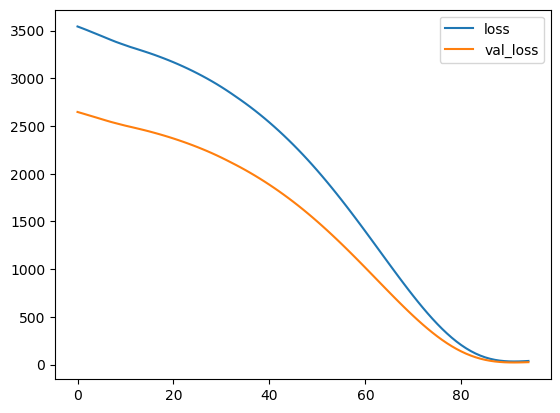

In [194]:
model_loss[['loss','val_loss']].plot();

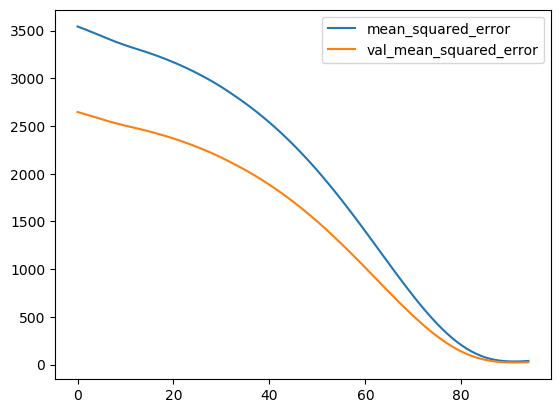

In [195]:
model_loss[['mean_squared_error','val_mean_squared_error']].plot()

In [196]:
pred = model.predict(X_test)

In [197]:
print(r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.9295413186219573
4.157301664352417
26.200721220563082
5.118664007391292
